In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data Preprocessing
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [3]:
print('Dimensions of the dataset',df.shape)


Dimensions of the dataset (205843, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [5]:
df.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

Dataframe consists of 3 columns containing null values[company_hash,orgyear,job_position)

In [7]:
len(df[df.duplicated()])

0

No presence of duplicate rows

# Data Preprocessing

In [10]:
df['email_hash'].value_counts().head(10)

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
Name: email_hash, dtype: int64

In [11]:
df['company_hash'].value_counts().head(10)

nvnv wgzohrnvzwj otqcxwto    8337
xzegojo                      5381
vbvkgz                       3481
zgn vuurxwvmrt vwwghzn       3411
wgszxkvzn                    3240
vwwtznhqt                    2870
fxuqg rxbxnta                2653
gqvwrt                       2504
bxwqgogen                    2130
wvustbxzx                    2033
Name: company_hash, dtype: int64

In [12]:
display(df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10002,10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10583,10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12784,12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20715,20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138253,138731,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159251,159887,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
165343,166040,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
178749,179593,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


Apparently for single Anonymised Personal Identifiable Information (PII) id there exists multiple rows with same joining dates and company but different job positions, this couldn't be possible.
We will take the first row in case of duplicated PII ids.

In [14]:
df=df.groupby('email_hash').first().reset_index()

In [15]:
df.head()

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,506,nqsn axsxnvr,2013.0,250000,Backend Engineer,2020.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,51626,gunhb,2021.0,1300000,FullStack Engineer,2019.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,bxwqgotbx wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,fvrbvqn rvmo,2009.0,3400000,None,2018.0


Creating null value indicator columns

In [17]:
for i in ['orgyear','ctc_updated_year','company_hash','job_position']:
    df[i+'_na']=df[i].isna()

Creating new columns[Feature Engineering]

In [19]:
df['YoE']=df['ctc_updated_year']-df['orgyear']

In [20]:
feat='company_hash'
df[feat]=df[feat].fillna('na')
enc_nom=(df.groupby(feat).size())/len(df)
df[feat+'_encode']=df[feat].apply(lambda x:enc_nom[x])

feat = 'job_position'
df[feat] = df[feat].fillna('na')
enc_nom = (df.groupby(feat).size()) / len(df)*10000
df[feat+'_encode'] = df[feat].apply(lambda x : enc_nom[x])

Remove outliers from Orgyear column

In [22]:
sorted(df['orgyear'].fillna(0).astype(int).unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 1970,
 1971,
 1972,
 1973,
 1976,
 1977,
 1979,
 1981,
 1982,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165]

Removing future years and single digit years

In [24]:
df=df[~df['orgyear'].isin([0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165])]

In [25]:
df=df[~(df['YoE']<0)]

# Univariate Analysis

Plotting Categorical Features

In [28]:
categorical_cols=['company_hash','job_position','orgyear','ctc_updated_year']

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\2467384229.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp=tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


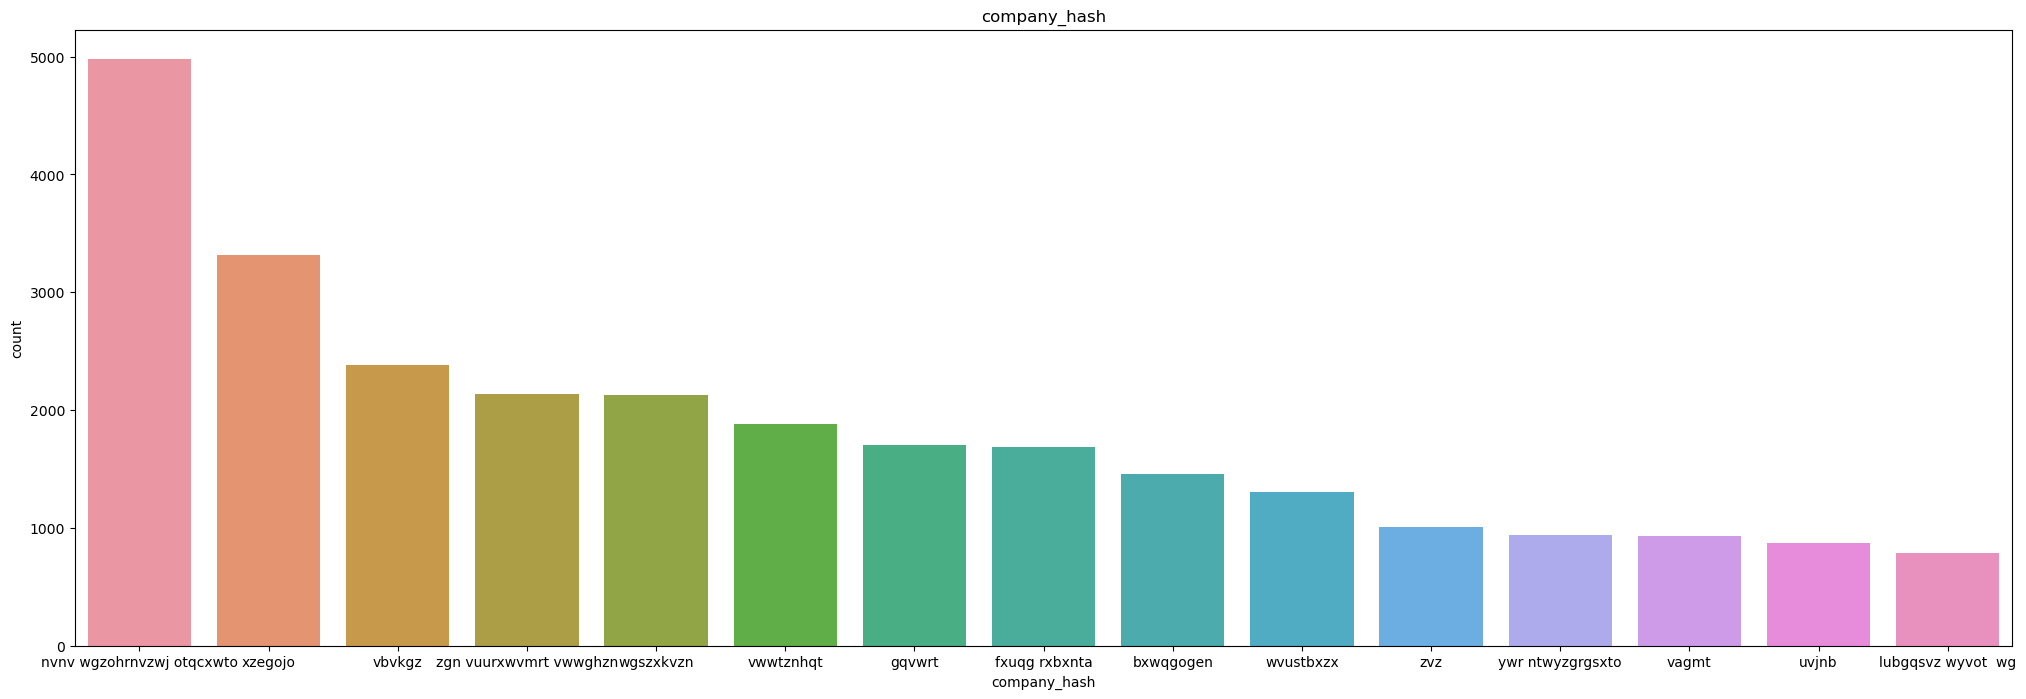

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\2467384229.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp=tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


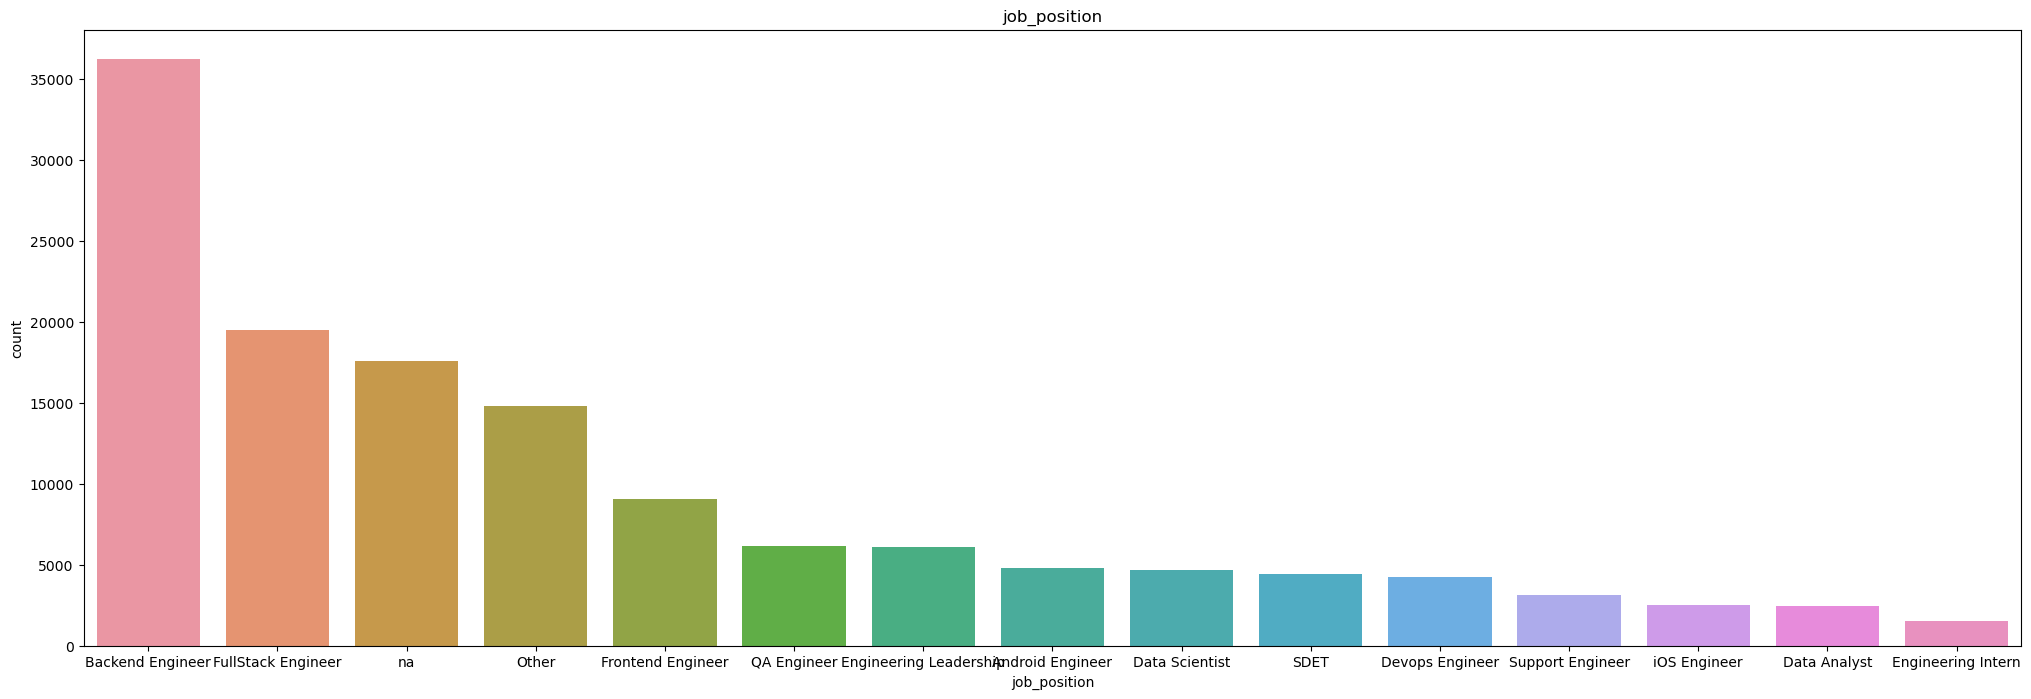

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\2467384229.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp=tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


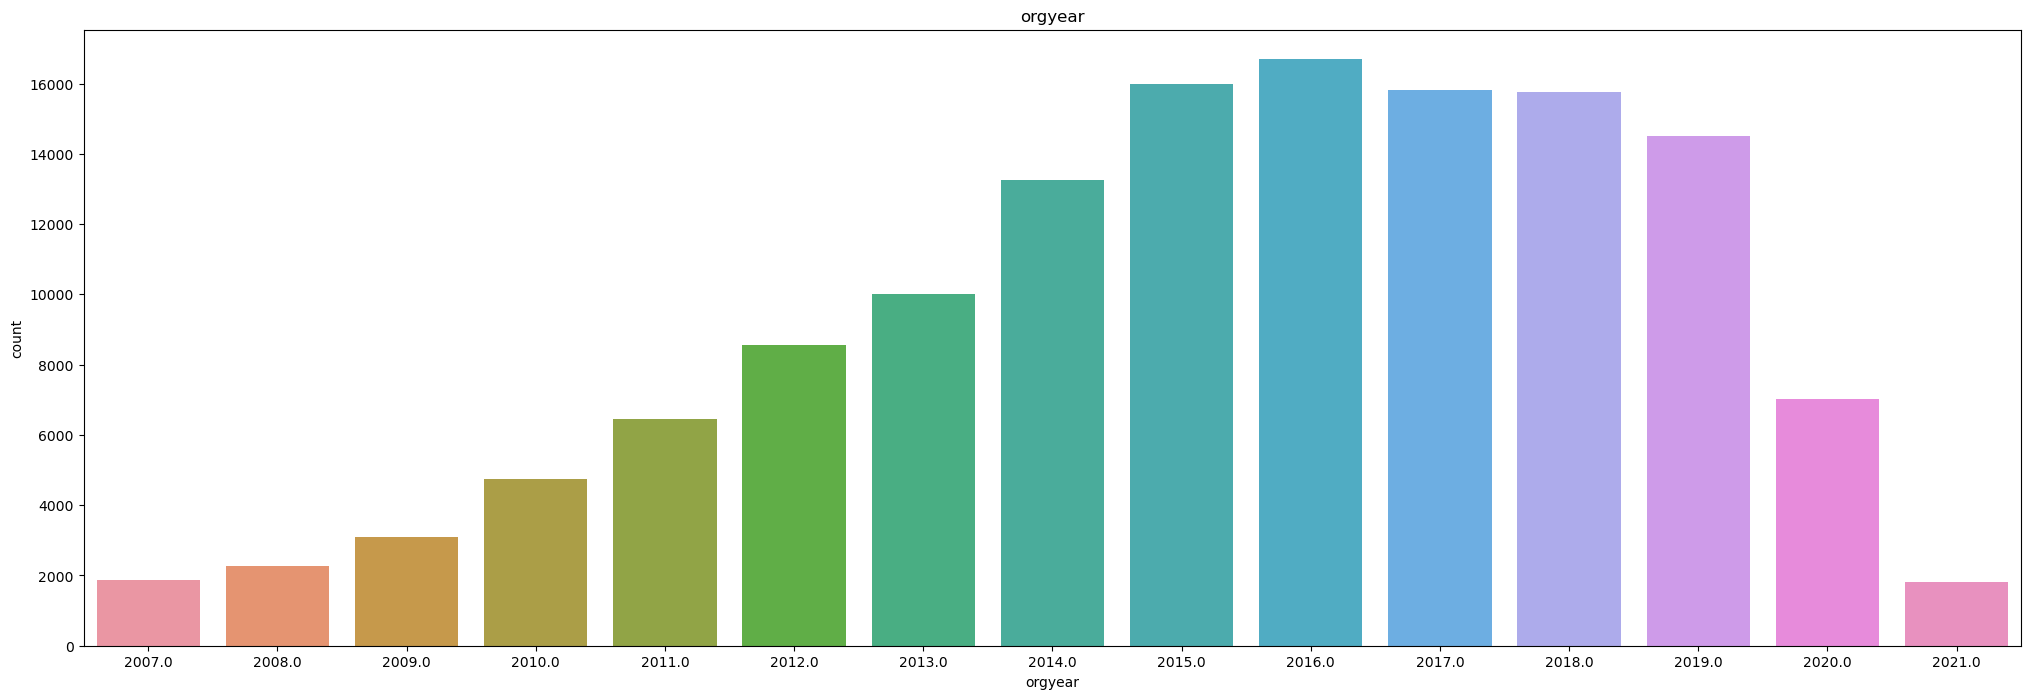

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\2467384229.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp=tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


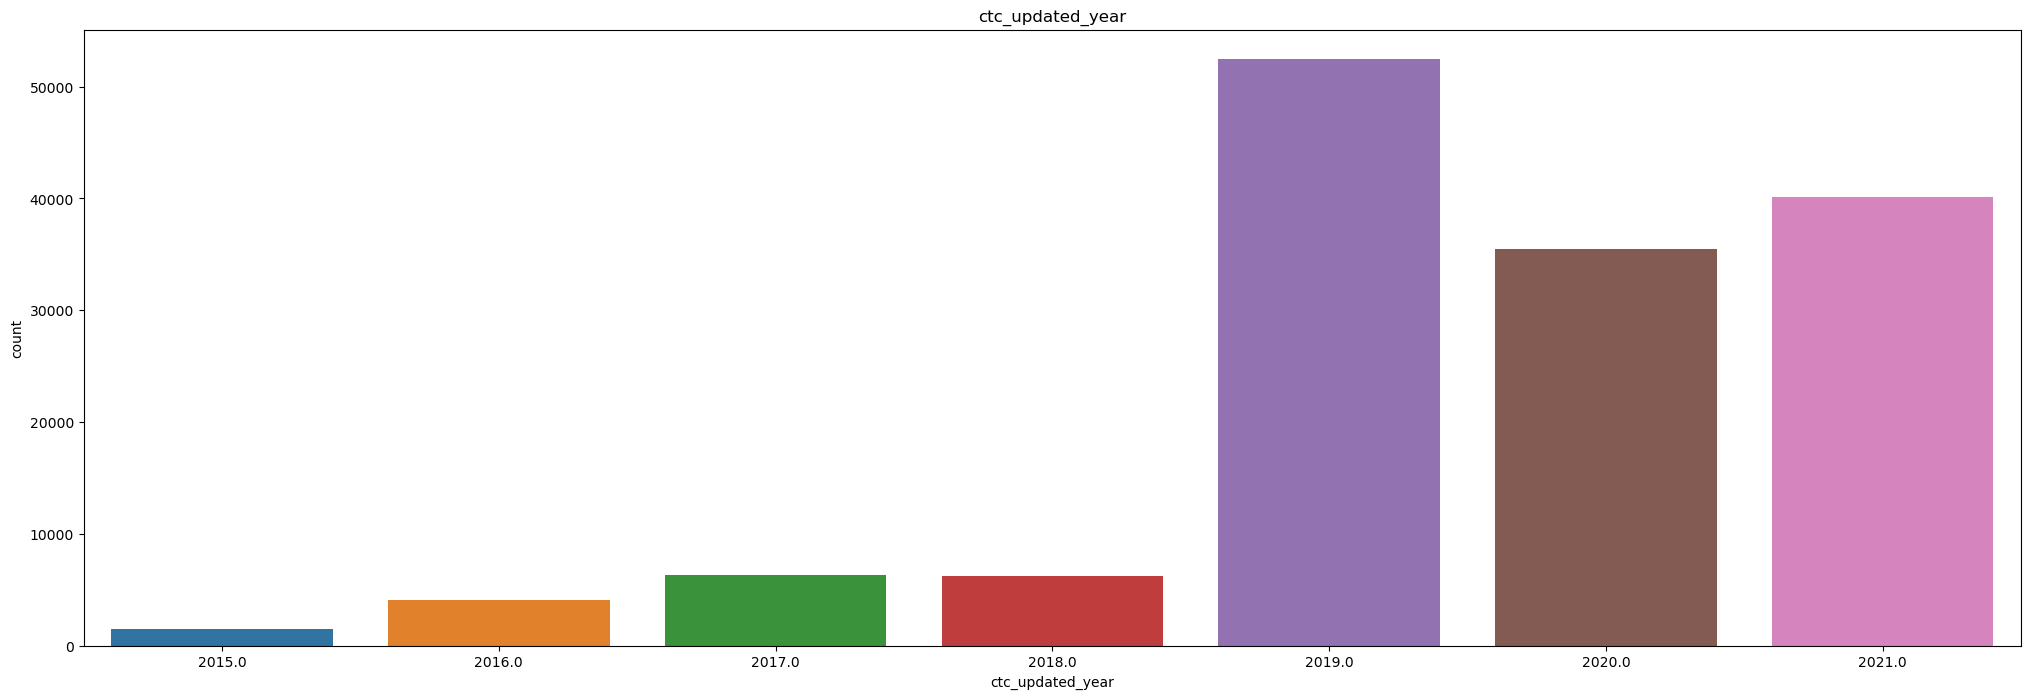

In [29]:
for i in categorical_cols:
    tmp=df.copy()
    tmp['count']=1
    tmp=tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(25,8))
    sns.barplot(data=tmp,y='count',x=i).set(title=i)
    plt.show()

Plotting Continous Features

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\3684212462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ctc'],kde=True,bins=50)


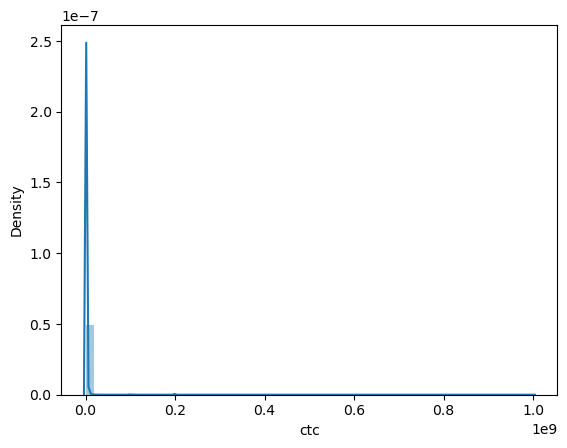

In [31]:
sns.distplot(df['ctc'],kde=True,bins=50)
plt.show()

The plot seems to be having large range of values, let's try to scale column for visualizing

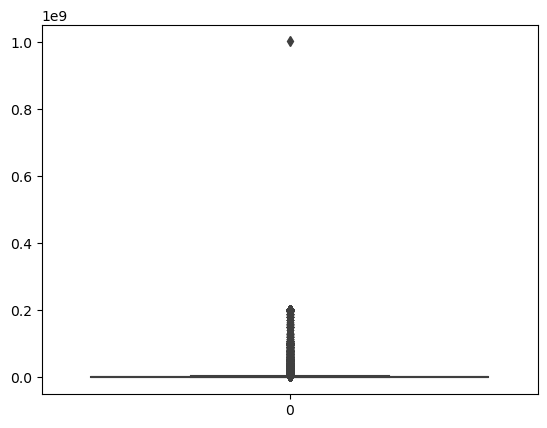

In [33]:
v=df['ctc']
sns.boxplot(v)
plt.show()

In [34]:
df.sort_values(['ctc']).iloc[1000:1020,:]

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na,YoE,company_hash_encode,job_position_encode
40428,439134c4b243fe33a240265f94d0c9d6e120f31cb6e2cc...,98842,trxztdn,2019.0,20000,QA Engineer,2019.0,False,False,False,False,0.0,0.000007,401.973371
30954,3394eeca520d9029ce6bd56e83faa5d4d82c396f453e2a...,97003,mrvmmtq,2011.0,20000,Android Engineer,2019.0,False,False,False,False,8.0,0.000007,317.968236
78889,83d1ece927b7d7e944454483a4a8a3b08a18ed846890ee...,88544,oxbgz eqvotq hzxctqoxnj,2016.0,20000,Other,2017.0,False,False,False,False,1.0,0.000026,1026.830810
90663,975e224e718de0d75c2d33d2bf24e75c4b7559664763b1...,125784,wgcvrtzot ntwyzgrgsxto,2016.0,20000,Backend Engineer,2019.0,False,False,False,False,3.0,0.000020,2431.717315
74910,7d43b749f1651cba0a16743d6235f5f32a9a58837ee081...,24380,ovu,2008.0,20000,QA Engineer,2019.0,False,False,False,False,11.0,0.004112,401.973371
38801,40bf699c6ab3273acfdda2c7922b30dbc5f8cedea903f4...,93058,zgzt,2008.0,20000,FullStack Engineer,2019.0,False,False,False,False,11.0,0.003395,1319.056588
25247,29e7d12a6225aeff7b5d92947f949e6646ec58111e5a5a...,4290,vqttzv bhrnxbtaxv,2001.0,20000,Other,2021.0,False,False,False,False,20.0,0.000007,1026.830810
117820,c4a7229bb63eade33516411b68d8501420e15987d116eb...,135189,uyvqbtvoj,2012.0,20000,Backend Engineer,2019.0,False,False,False,False,7.0,0.000398,2431.717315
73669,7b3b93e56fd67d3ddfeb41f68a88a61d01c397aab9bbe1...,151028,bvqxogen,2017.0,20000,na,2019.0,False,False,False,True,2.0,0.000007,1318.013855
71300,774a4a75a15f53e19bbf4ef85a5c6dc3da689e4291f773...,77722,rxetonjrt xzntqzvnxgzvr ucn rna,2010.0,20000,Other,2016.0,False,False,False,False,6.0,0.000007,1026.830810


In [35]:
df=df[df['ctc']>702475]

Outlier Removal Using IQR

In [37]:
dftmp=df.copy()
print(dftmp.shape)
cols=['ctc']

Q1=dftmp[cols].quantile(0.25)
Q3=dftmp[cols].quantile(0.75)
IQR=Q3-Q1

dftmp=dftmp[~((dftmp[cols] < (Q1-1.5*IQR)) |(dftmp[cols] > (Q3 +1.5*IQR))).any(axis=1)]
print(dftmp.shape)

(92558, 14)
(86464, 14)


C:\Users\junai\AppData\Local\Temp\ipykernel_1832\934391833.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,kde=True,bins=50)


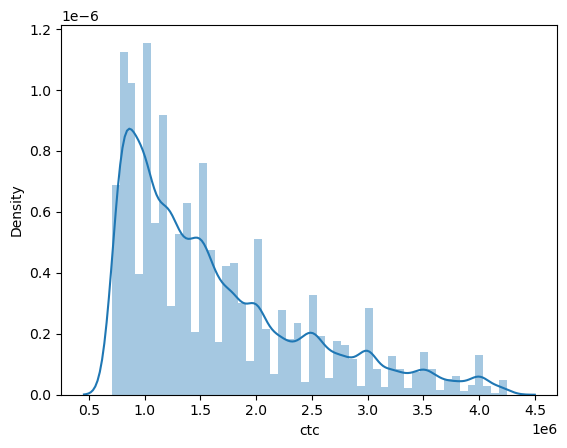

In [38]:
v=dftmp['ctc']
sns.distplot(v,kde=True,bins=50)
plt.show()

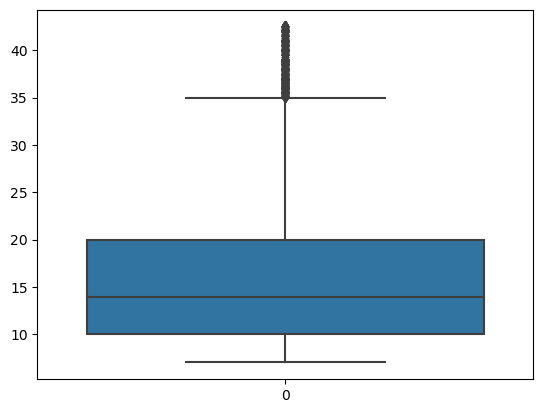

In [39]:
v=dftmp['ctc']/100000
sns.boxplot(v)
plt.show()

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\4039362743.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,kde=True,bins=20)


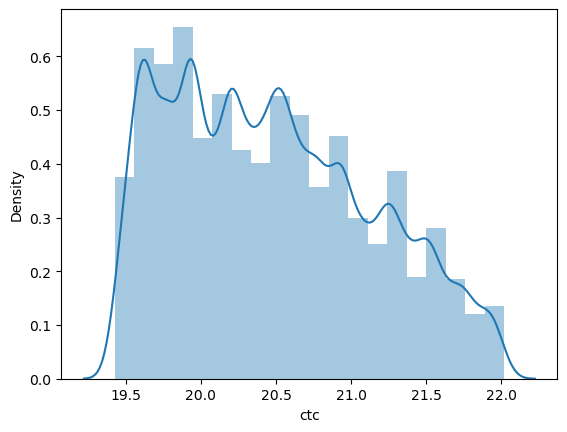

In [40]:
v=np.log2(dftmp['ctc'])
sns.distplot(v,kde=True,bins=20)
plt.show()

# Mutivariate Analysis

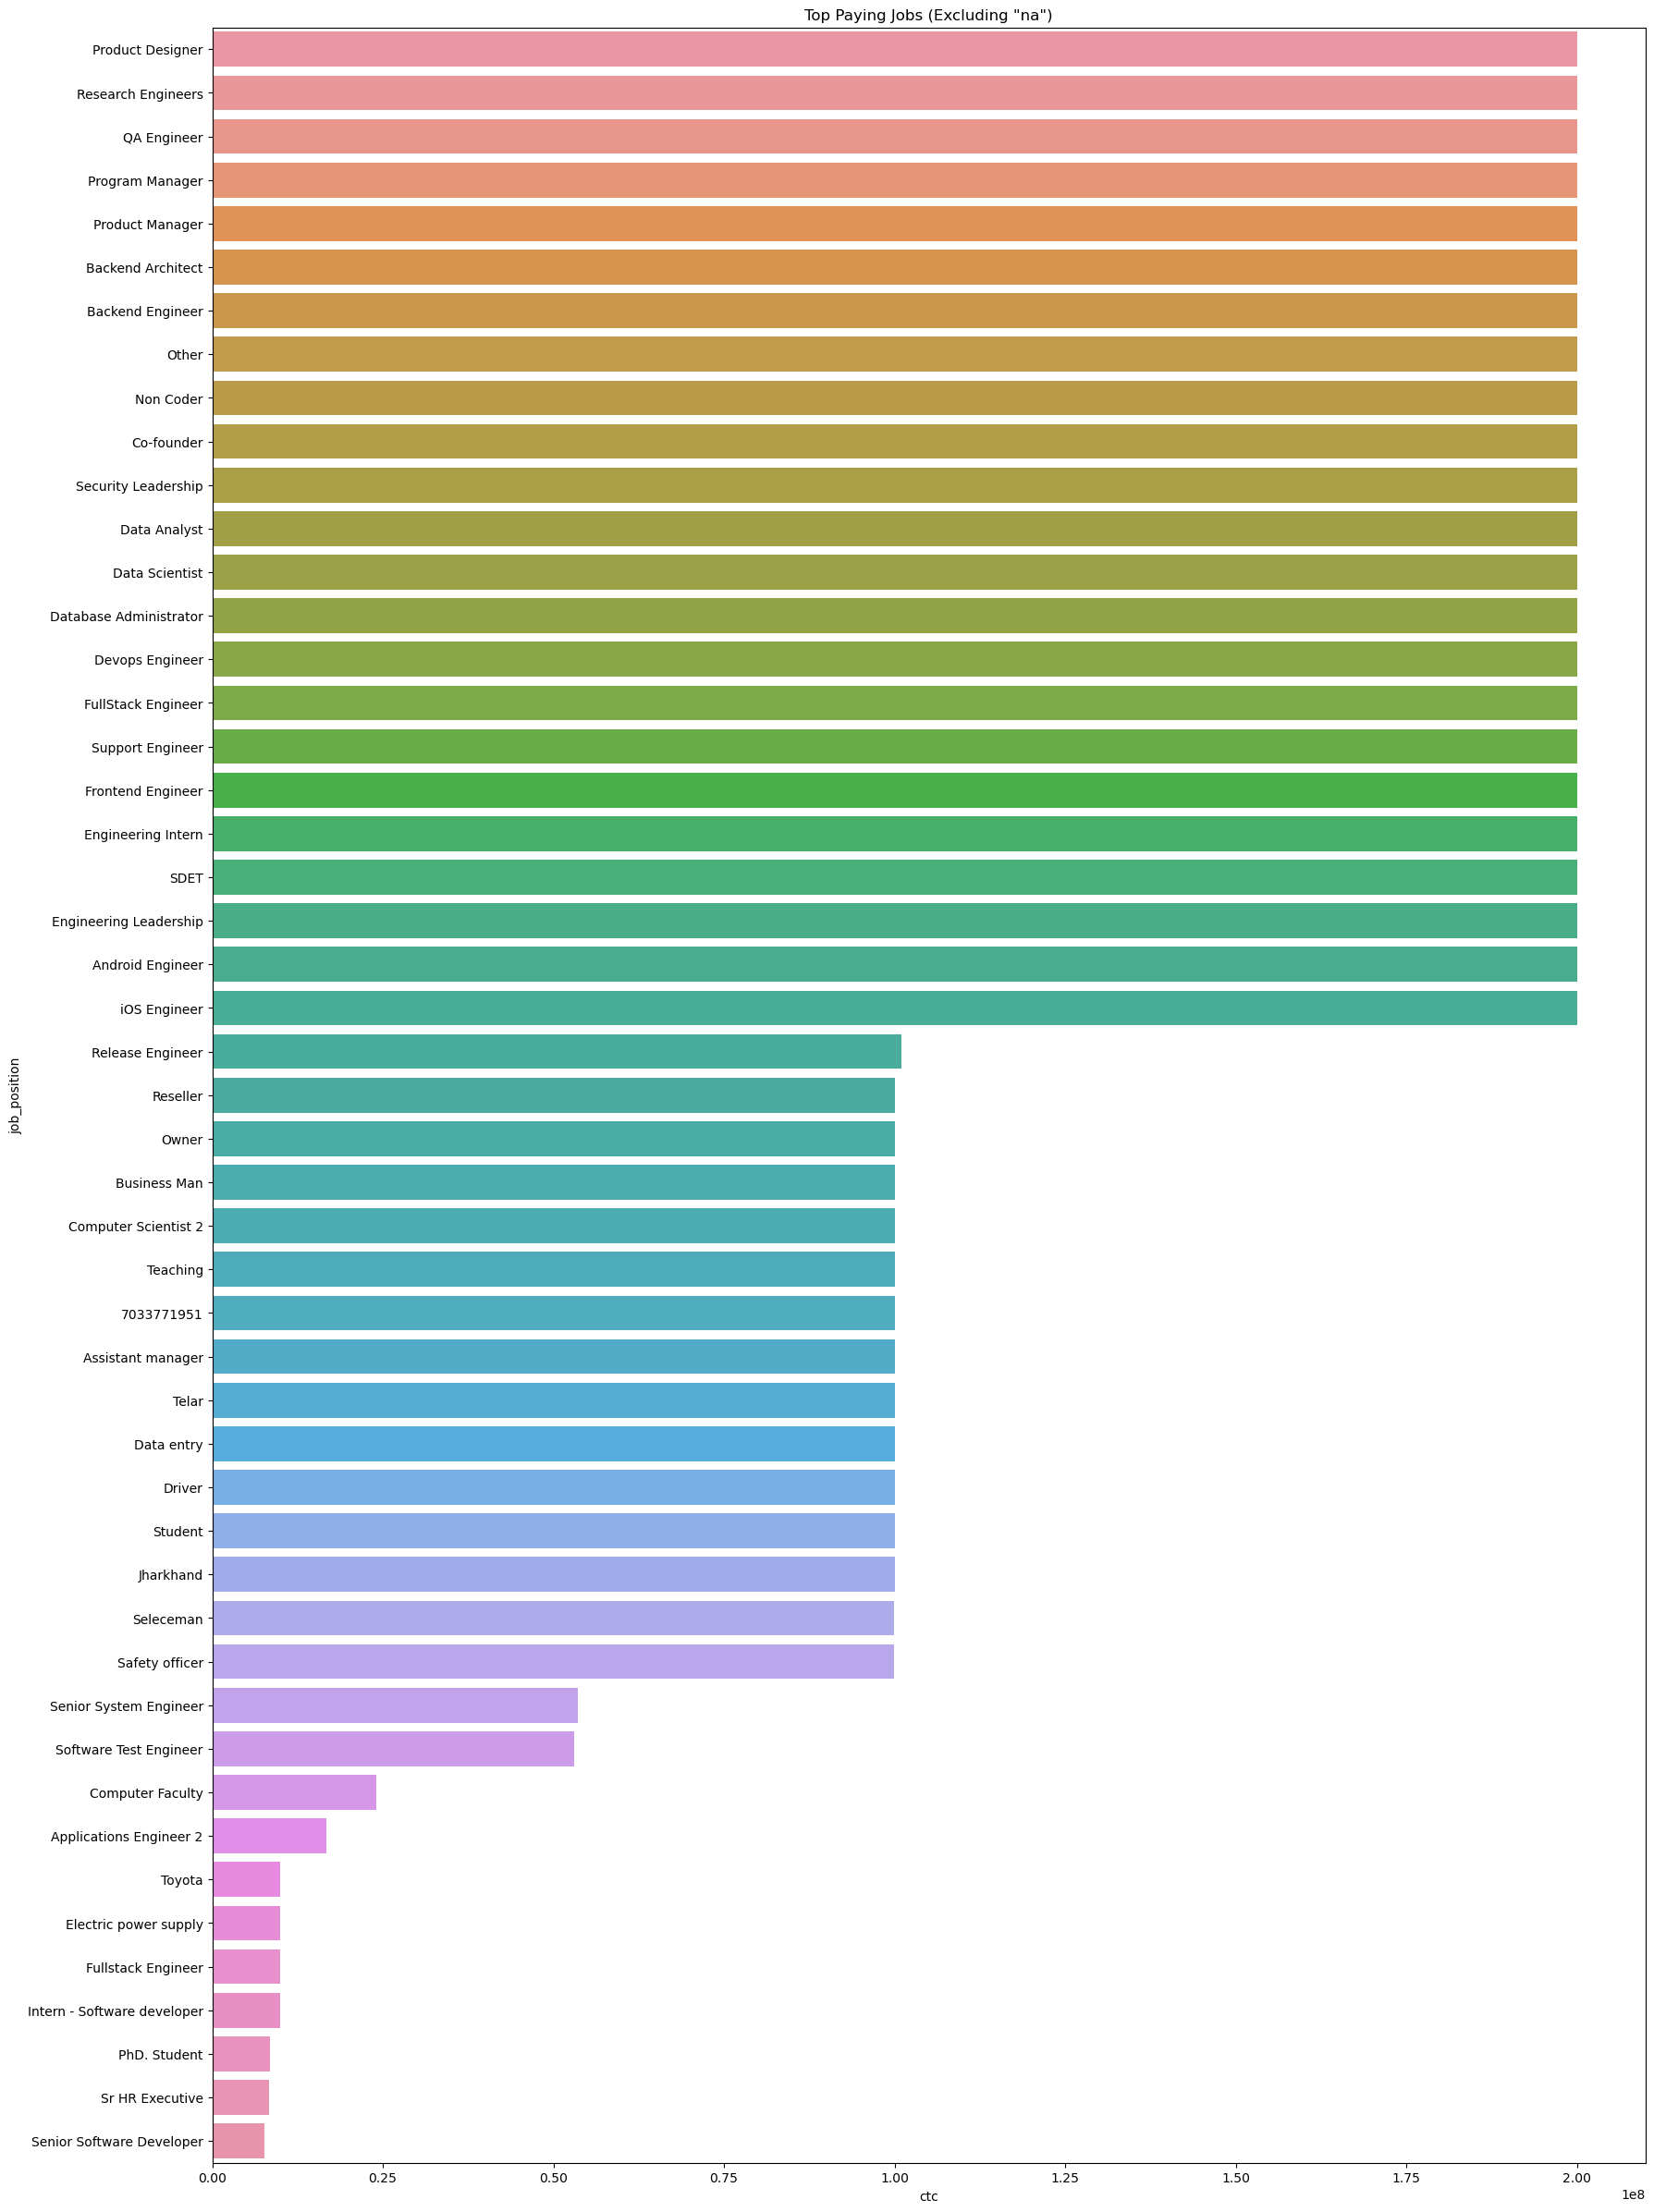

['Product Designer', 'Research Engineers', 'QA Engineer', 'Program Manager', 'Product Manager', 'Backend Architect', 'Backend Engineer', 'Other', 'Non Coder', 'Co-founder', 'Security Leadership', 'Data Analyst', 'Data Scientist', 'Database Administrator', 'Devops Engineer', 'FullStack Engineer', 'Support Engineer', 'Frontend Engineer', 'Engineering Intern', 'SDET', 'Engineering Leadership', 'Android Engineer', 'iOS Engineer', 'Release Engineer', 'Reseller', 'Owner', 'Business Man', 'Computer Scientist 2', 'Teaching', '7033771951', 'Assistant manager', 'Telar', 'Data entry', 'Driver', 'Student', 'Jharkhand', 'Seleceman', 'Safety officer', 'Senior System Engineer', 'Software Test Engineer', 'Computer Faculty', 'Applications Engineer 2', 'Toyota', 'Electric power supply', 'Fullstack Engineer', 'Intern - Software developer', 'PhD. Student', 'Sr HR Executive', 'Senior Software Developer']


In [42]:
tmp = df.copy()

# Group by 'job_position', get the max 'ctc', and sort in descending order
tmp = (
    tmp.groupby(['job_position'])
    .max()['ctc']
    .reset_index()
    .sort_values('ctc', ascending=False)
    .head(50)
)

# Filter out rows where 'job_position' is 'na'
tmp = tmp[tmp['job_position'] != 'na']

# Plot the bar chart
plt.figure(figsize=(20, 30))
sns.barplot(data=tmp, x='ctc', y='job_position').set(title='Top Paying Jobs (Excluding "na")')
plt.show()

# Generate the updated list of job positions
job_position_list = list(tmp['job_position'])
print(job_position_list)

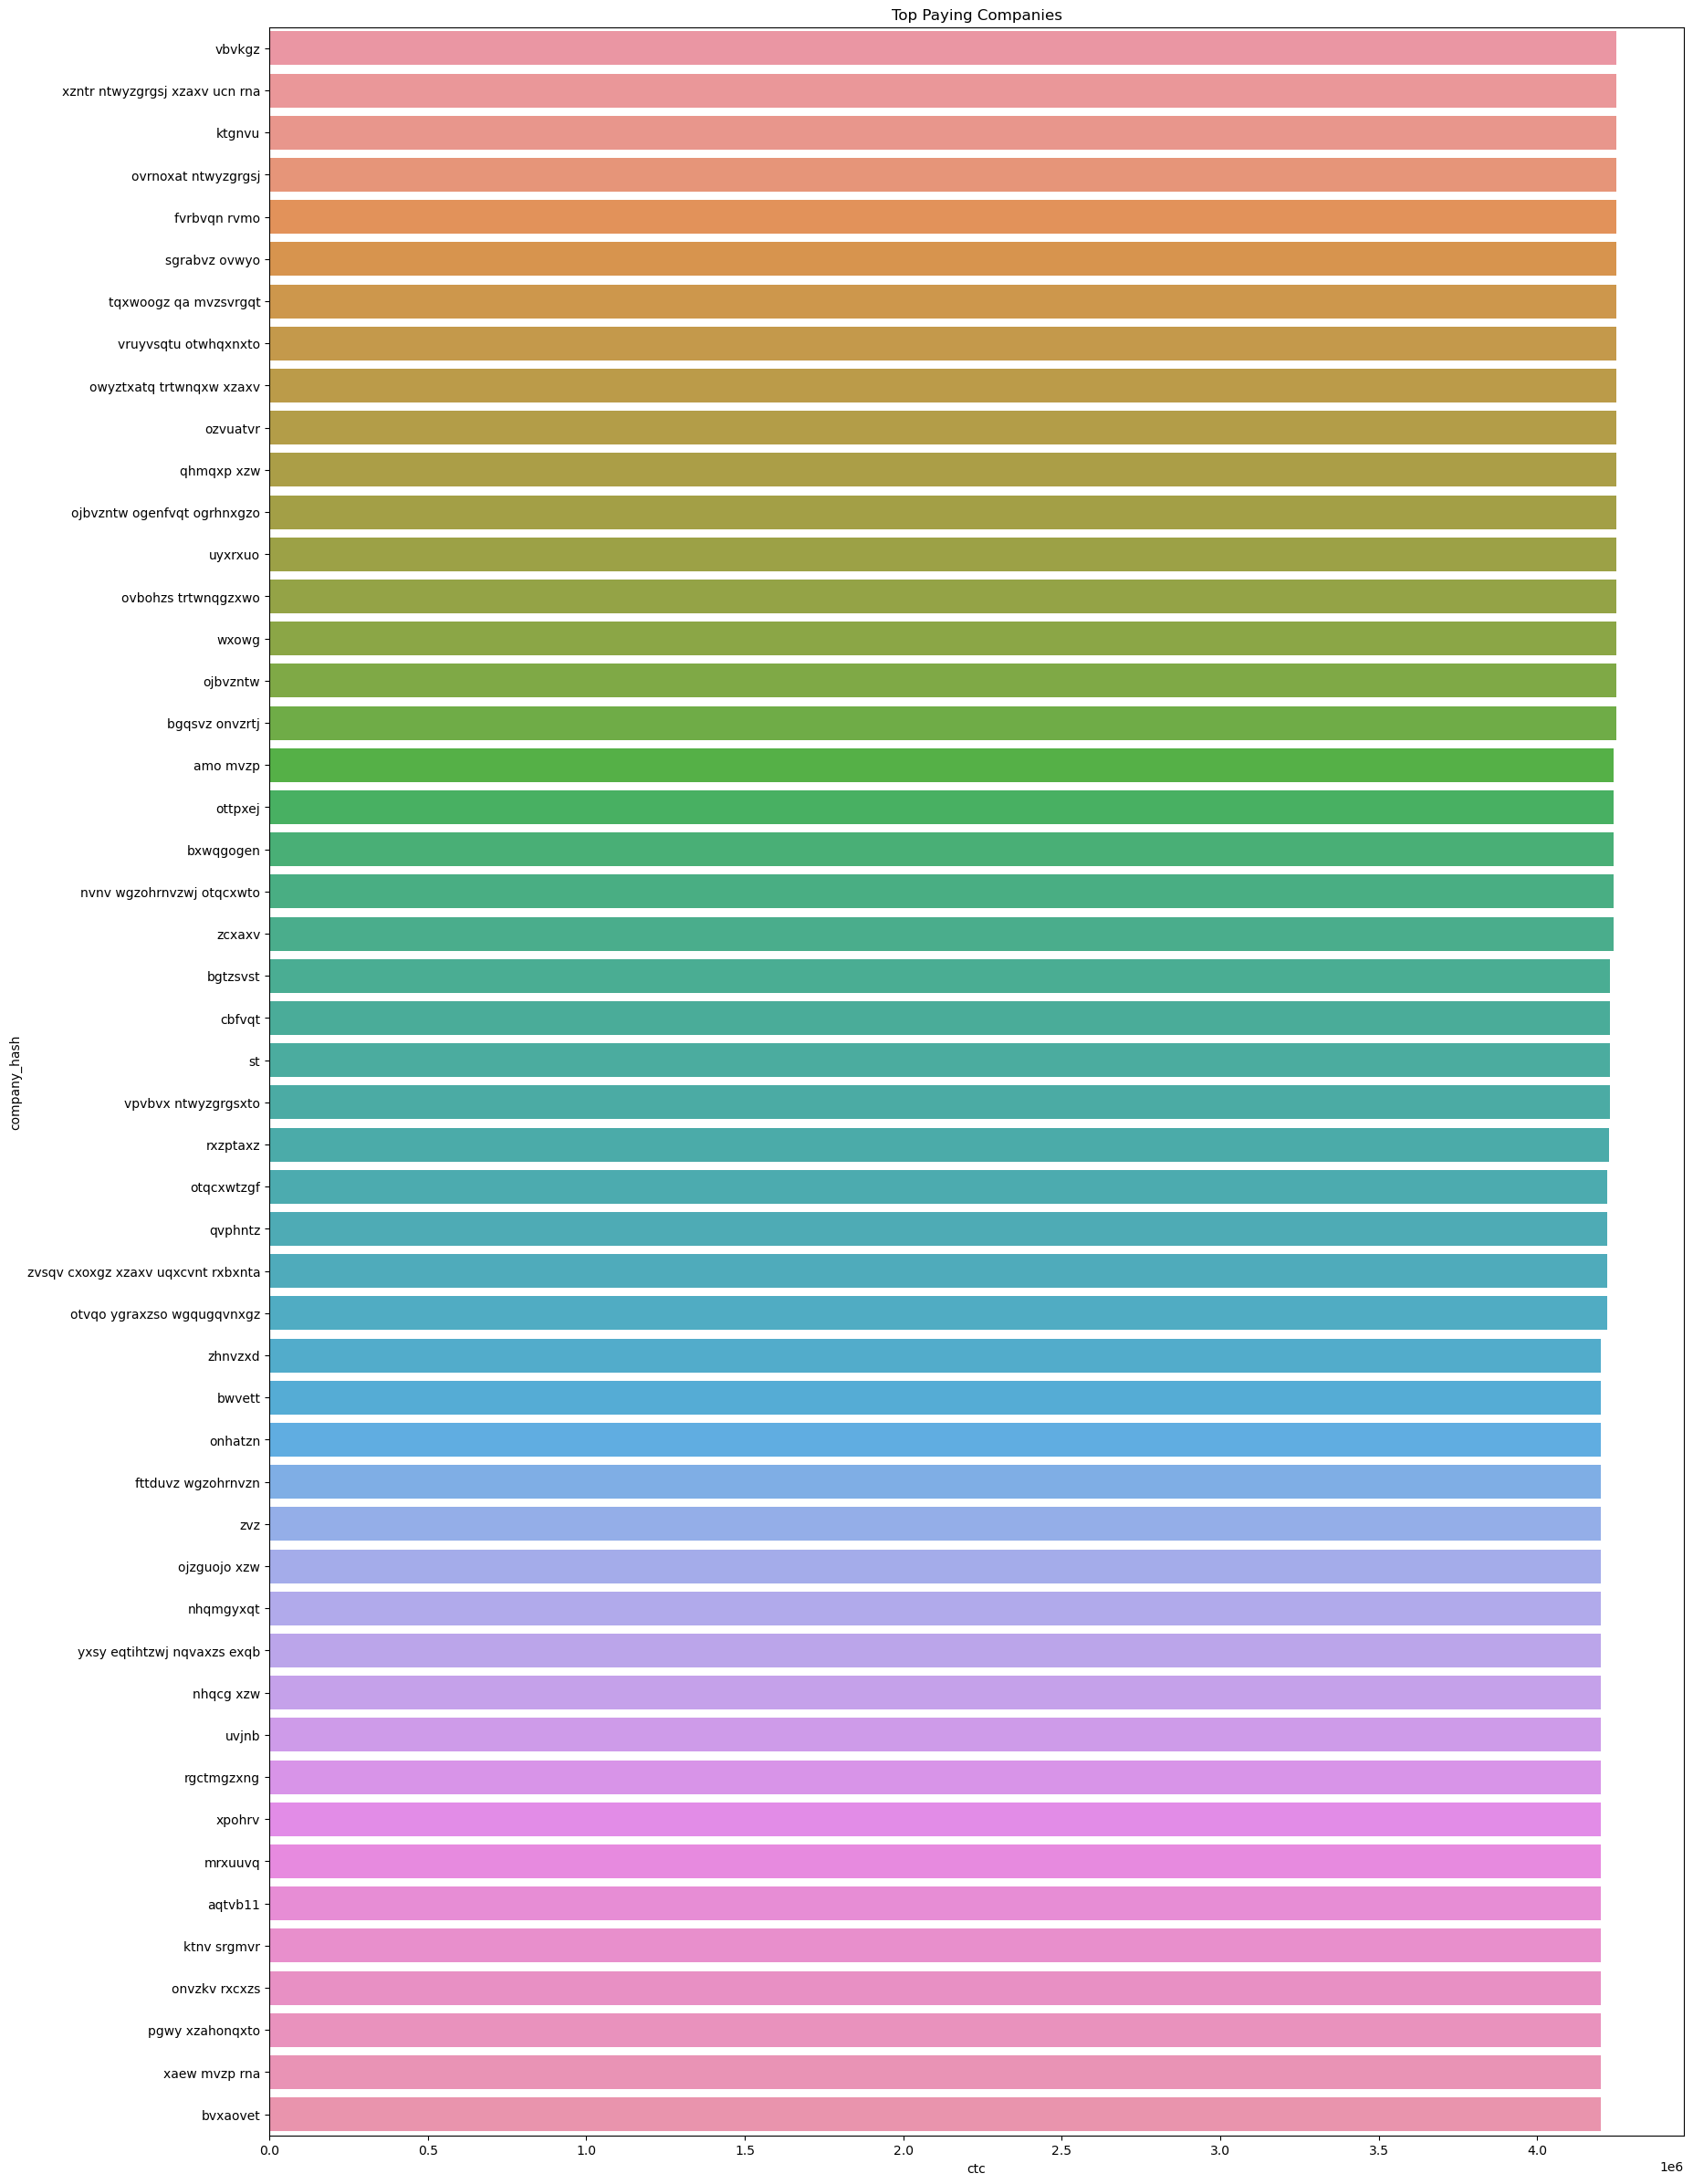

['vbvkgz',
 'xzntr ntwyzgrgsj xzaxv ucn rna',
 'ktgnvu',
 'ovrnoxat ntwyzgrgsj',
 'fvrbvqn rvmo',
 'sgrabvz ovwyo',
 'tqxwoogz qa mvzsvrgqt',
 'vruyvsqtu otwhqxnxto',
 'owyztxatq trtwnqxw xzaxv',
 'ozvuatvr',
 'qhmqxp xzw',
 'ojbvzntw ogenfvqt ogrhnxgzo',
 'uyxrxuo',
 'ovbohzs trtwnqgzxwo',
 'wxowg',
 'ojbvzntw',
 'bgqsvz onvzrtj',
 'amo mvzp',
 'ottpxej',
 'bxwqgogen',
 'nvnv wgzohrnvzwj otqcxwto',
 'zcxaxv',
 'bgtzsvst',
 'cbfvqt',
 'st',
 'vpvbvx ntwyzgrgsxto',
 'rxzptaxz',
 'otqcxwtzgf',
 'qvphntz',
 'zvsqv cxoxgz xzaxv uqxcvnt rxbxnta',
 'otvqo ygraxzso wgqugqvnxgz',
 'zhnvzxd',
 'bwvett',
 'onhatzn',
 'fttduvz wgzohrnvzn',
 'zvz',
 'ojzguojo xzw',
 'nhqmgyxqt',
 'yxsy eqtihtzwj nqvaxzs exqb',
 'nhqcg xzw',
 'uvjnb',
 'rgctmgzxng',
 'xpohrv',
 'mrxuuvq',
 'aqtvb11',
 'ktnv srgmvr',
 'onvzkv rxcxzs',
 'pgwy xzahonqxto',
 'xaew mvzp rna',
 'bvxaovet']

In [43]:
tmp=dftmp.copy()
tmp=tmp.groupby(['company_hash']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='company_hash').set(title='Top Paying Companies')
plt.show()

list(tmp['company_hash'])

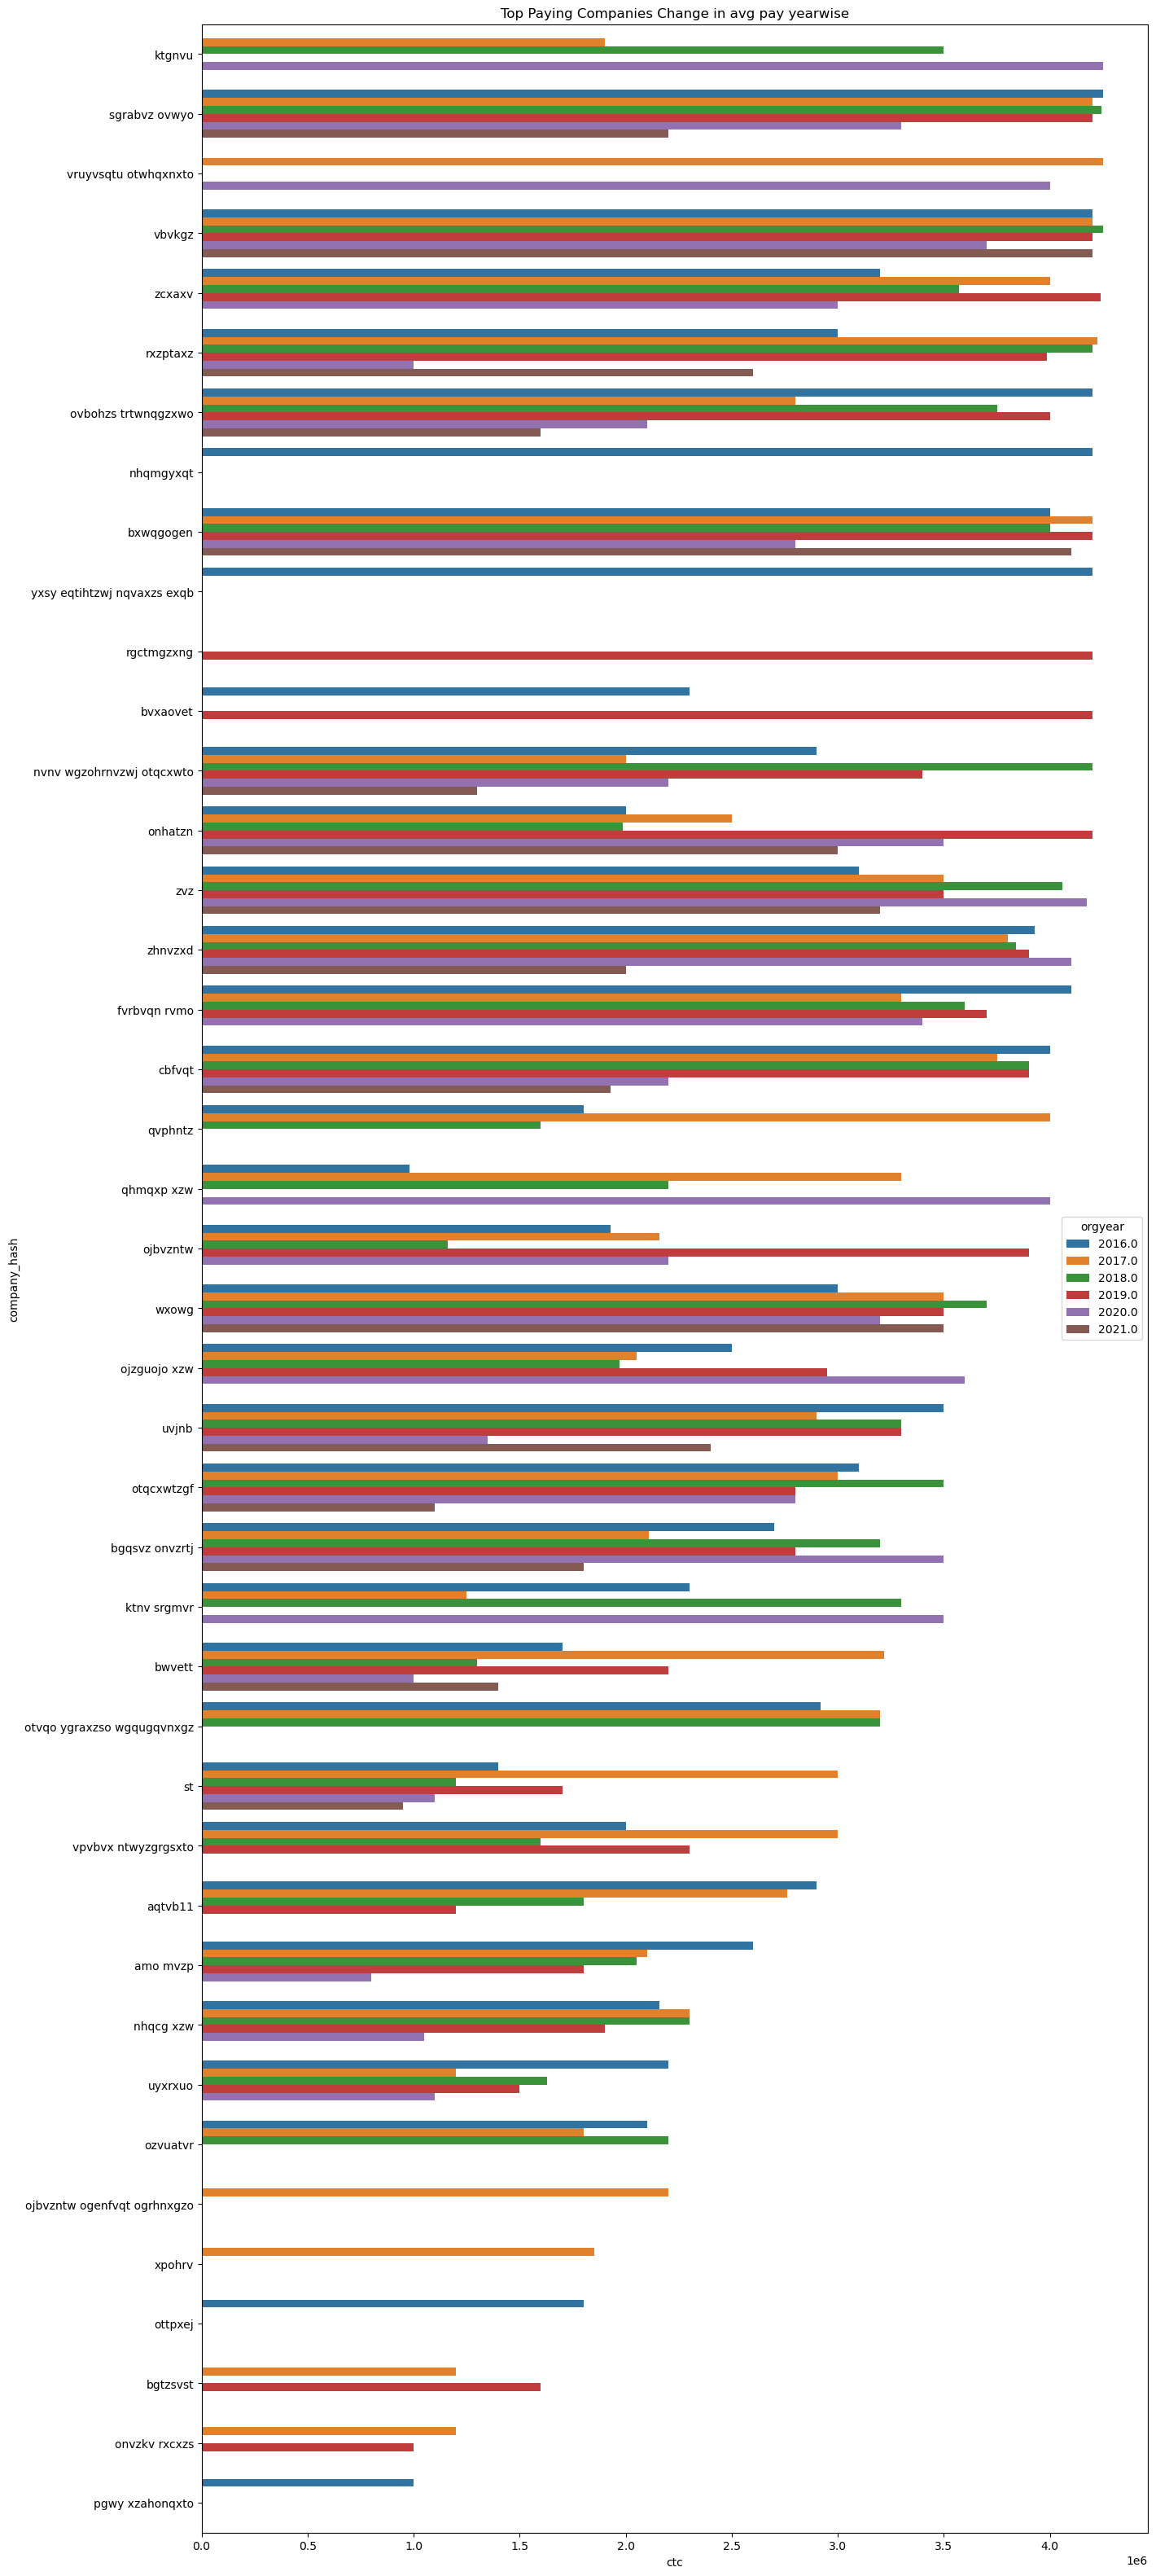

In [44]:
tmp=dftmp.copy()
tmp=tmp[tmp['company_hash'].isin(['vbvkgz',
 'xzntr ntwyzgrgsj xzaxv ucn rna',
 'ktgnvu',
 'ovrnoxat ntwyzgrgsj',
 'fvrbvqn rvmo',
 'sgrabvz ovwyo',
 'tqxwoogz qa mvzsvrgqt',
 'vruyvsqtu otwhqxnxto',
 'owyztxatq trtwnqxw xzaxv',
 'ozvuatvr',
 'qhmqxp xzw',
 'ojbvzntw ogenfvqt ogrhnxgzo',
 'uyxrxuo',
 'ovbohzs trtwnqgzxwo',
 'wxowg',
 'ojbvzntw',
 'bgqsvz onvzrtj',
 'amo mvzp',
 'ottpxej',
 'bxwqgogen',
 'nvnv wgzohrnvzwj otqcxwto',
 'zcxaxv',
 'bgtzsvst',
 'cbfvqt',
 'st',
 'vpvbvx ntwyzgrgsxto',
 'rxzptaxz',
 'otqcxwtzgf',
 'qvphntz',
 'zvsqv cxoxgz xzaxv uqxcvnt rxbxnta',
 'otvqo ygraxzso wgqugqvnxgz',
 'zhnvzxd',
 'bwvett',
 'onhatzn',
 'fttduvz wgzohrnvzn',
 'zvz',
 'ojzguojo xzw',
 'nhqmgyxqt',
 'yxsy eqtihtzwj nqvaxzs exqb',
 'nhqcg xzw',
 'uvjnb',
 'rgctmgzxng',
 'xpohrv',
 'mrxuuvq',
 'aqtvb11',
 'ktnv srgmvr',
 'onvzkv rxcxzs',
 'pgwy xzahonqxto',
 'xaew mvzp rna',
 'bvxaovet'])]
tmp=tmp[tmp['orgyear'] >= 2016]
tmp=tmp.groupby(['company_hash','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=tmp,x='ctc',y='company_hash',hue='orgyear').set(title='Top Paying Companies Change in avg pay yearwise')
plt.show()

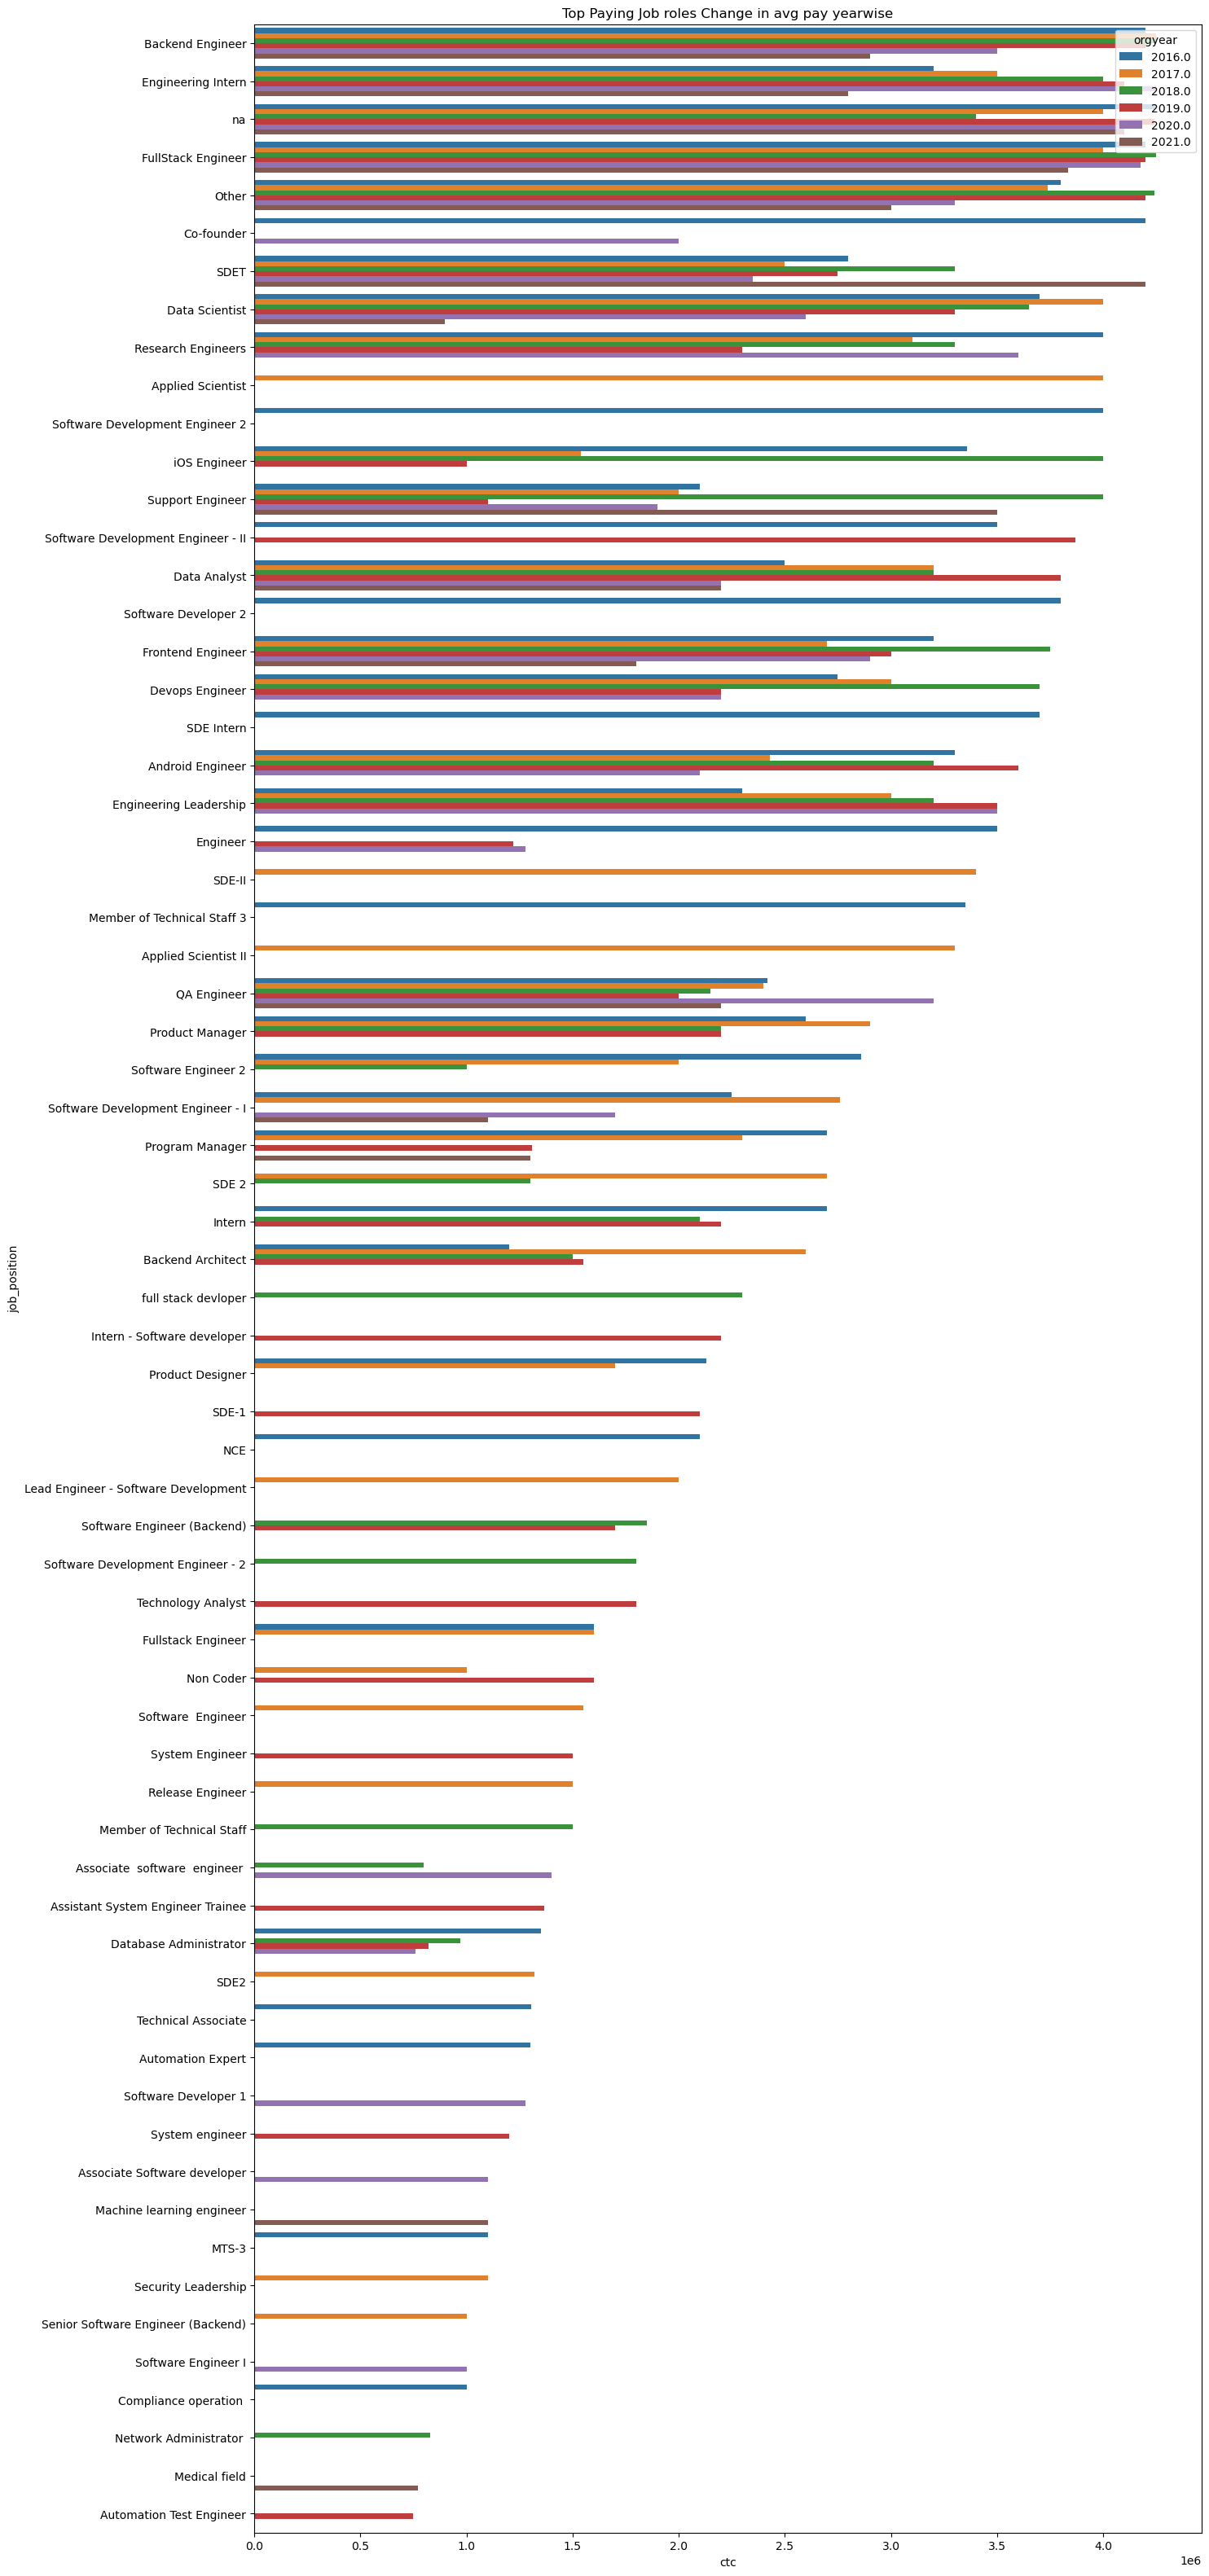

In [45]:
tmp=dftmp.copy()
tmp=tmp[tmp['company_hash'].isin(['vbvkgz',
 'xzntr ntwyzgrgsj xzaxv ucn rna',
 'ktgnvu',
 'ovrnoxat ntwyzgrgsj',
 'fvrbvqn rvmo',
 'sgrabvz ovwyo',
 'tqxwoogz qa mvzsvrgqt',
 'vruyvsqtu otwhqxnxto',
 'owyztxatq trtwnqxw xzaxv',
 'ozvuatvr',
 'qhmqxp xzw',
 'ojbvzntw ogenfvqt ogrhnxgzo',
 'uyxrxuo',
 'ovbohzs trtwnqgzxwo',
 'wxowg',
 'ojbvzntw',
 'bgqsvz onvzrtj',
 'amo mvzp',
 'ottpxej',
 'bxwqgogen',
 'nvnv wgzohrnvzwj otqcxwto',
 'zcxaxv',
 'bgtzsvst',
 'cbfvqt',
 'st',
 'vpvbvx ntwyzgrgsxto',
 'rxzptaxz',
 'otqcxwtzgf',
 'qvphntz',
 'zvsqv cxoxgz xzaxv uqxcvnt rxbxnta',
 'otvqo ygraxzso wgqugqvnxgz',
 'zhnvzxd',
 'bwvett',
 'onhatzn',
 'fttduvz wgzohrnvzn',
 'zvz',
 'ojzguojo xzw',
 'nhqmgyxqt',
 'yxsy eqtihtzwj nqvaxzs exqb',
 'nhqcg xzw',
 'uvjnb',
 'rgctmgzxng',
 'xpohrv',
 'mrxuuvq',
 'aqtvb11',
 'ktnv srgmvr',
 'onvzkv rxcxzs',
 'pgwy xzahonqxto',
 'xaew mvzp rna',
 'bvxaovet'])]
tmp=tmp[tmp['orgyear'] >= 2016]
tmp=tmp.groupby(['job_position','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=tmp,x='ctc',y='job_position',hue='orgyear').set(title='Top Paying Job roles Change in avg pay yearwise')
plt.show()

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\772749862.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp=tmp.groupby(['orgyear']).mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)


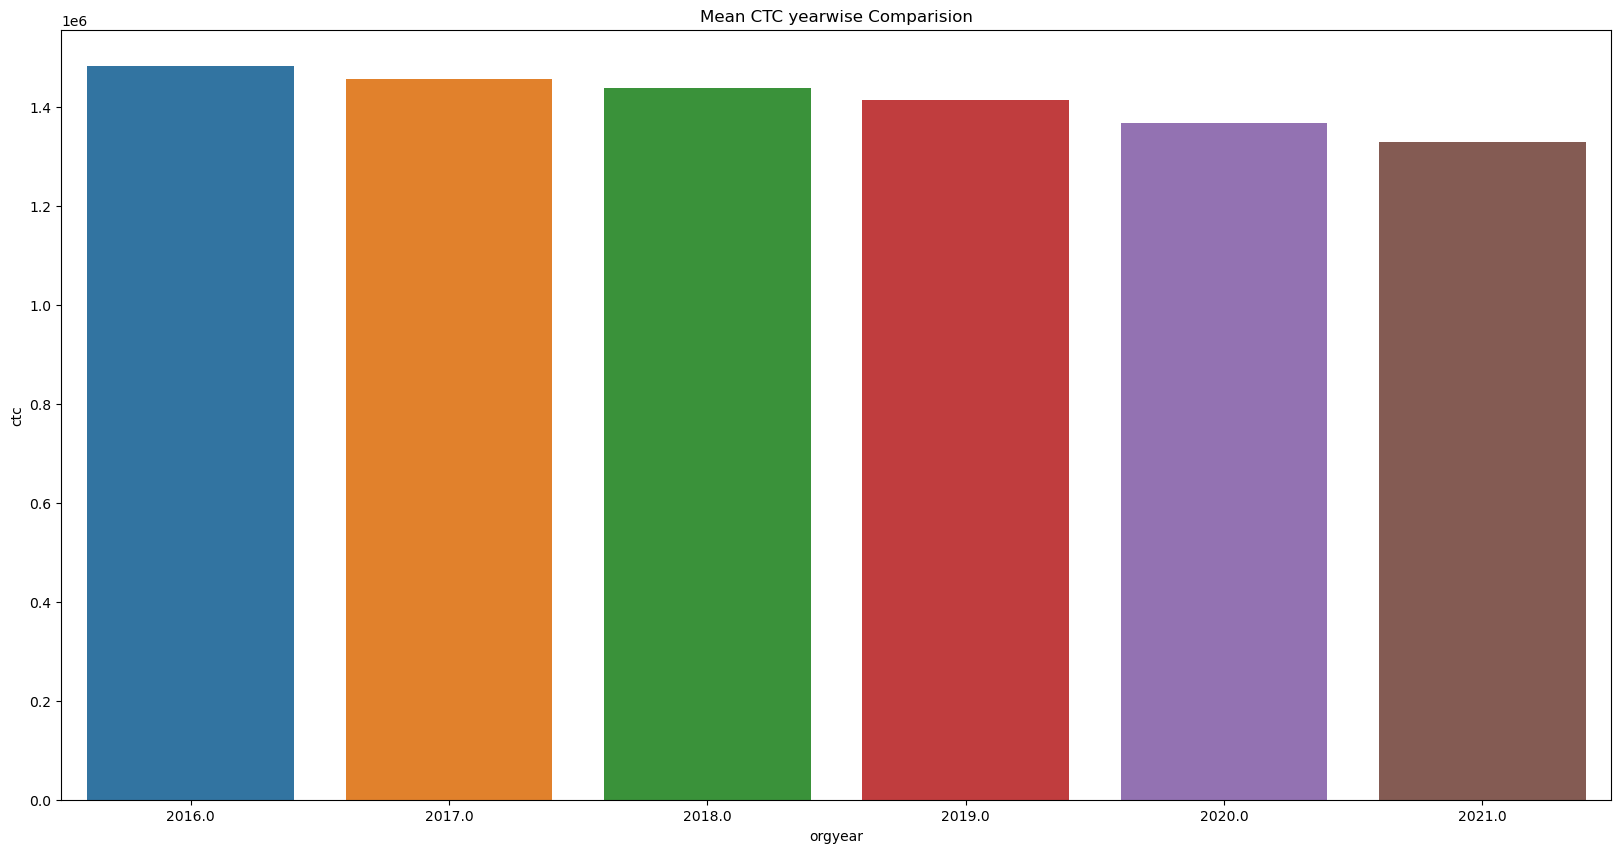

In [46]:
tmp=dftmp.copy()

tmp=tmp[tmp['orgyear'] >= 2016]
tmp=tmp.groupby(['orgyear']).mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,10))
sns.barplot(data=tmp,y='ctc',x='orgyear').set(title='Mean CTC yearwise Comparision')
plt.show()

# Manual Clustering

In [48]:
dateda=dftmp.copy()
grp=['company_hash','job_position','YoE']
data_tmp1=dateda.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()
data_tmp1.columns=['{} {}'.format(b_,a_) if a_ not in grp else '{}'.format(a_) for a_,b_ in zip ( data_tmp1.columns.droplevel(1),data_tmp1.columns.droplevel(0))]
data_tmp1.head(100).tail(50)

datatmp=dateda.merge(data_tmp1[['company_hash','job_position','YoE','mean ctc']],on=['company_hash','job_position','YoE'],how='left')

col1='ctc'
col2='mean ctc'
conditions=[datatmp[col1]>datatmp[col2],datatmp[col1]==datatmp[col2],datatmp[col1]<datatmp[col2]]
choices=[1,2,3]

datatmp['Designation']=np.select(conditions,choices,default=np.nan)

In [49]:
grp = ['company_hash','job_position']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean2 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean2 ctc' 
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]
    
datatmp['Class'] = np.select(conditions, choices, default=np.nan)

In [50]:
grp = ['company_hash']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean3 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean3 ctc' 
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]
    
datatmp['Tier'] = np.select(conditions, choices, default=np.nan)

In [51]:
datatmp['diff_desig']=datatmp['ctc']-datatmp['mean ctc']
datatmp['diff_class']=datatmp['ctc']-datatmp['mean2 ctc']
datatmp['diff_tier']=datatmp['ctc']-datatmp['mean3 ctc']

# Answering Questions based on Manual Clustering

Top 10 employees (earning more than most of the employees in the company) - Tier1

In [54]:
datatmp[datatmp['Tier']==1].sort_values('diff_tier',ascending=False).head(10)[['email_hash','ctc','mean3 ctc']]


,email_hash,ctc,mean3 ctc
76180,e15abfd41c005995728191e49ef001e83e813cd3ed5104...,4240000,1.051315e+06
59575,b022b84623593cc38a3c1d39d4545b368a7b5f286be1c7...,4200000,1.051315e+06
49030,90d5114ca752c55babef2c517ac8b17aaee3d9ff5740de...,4200000,1.051315e+06
54761,a1c1c8919e2918b24241a40271e02381daf199c61d7a3b...,4200000,1.143837e+06
70667,d13d7376e9ced16b4e250d0643f9139f8b36a62847f71b...,4200000,1.147773e+06
14808,2b10e1d996c6ab5e175eea35ca25ea7afbaacd1237ab64...,4200000,1.158025e+06
31649,5d872e52cb535a71fc75a5a97e779bb4c1554d0baa920d...,4200000,1.158025e+06
47727,8d0ed00904247626f5557f5983feeb5a0567d7726eea39...,4200000,1.176534e+06
31826,5dff6a65d548553262b6a289f014b2b72a5d47ff6dfa5c...,4170000,1.165011e+06
45627,86b90dd64ddb663ea35be98422947a01ba9ab837fb76df...,4000000,1.051315e+06


Top 10 Employees of DS earning more than their peers- Class 1

In [56]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 1)&(datatmp['job_position'].
                                                        isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
81289,f04a0228e5af6f8f6ecc33e089892e80d85b3c749b3244...,4000000,1.533750e+06
56231,a63f3f44de7586430615a8a9bd13d41e7b0d541ca0f690...,4200000,1.862000e+06
16846,31616edfc502824631b11793313d35d5bb2288319dcb25...,3800000,1.513842e+06
21441,3efbb8c4d67b4a4c6ba4c639cd84e9ff98b85d5f57d82f...,3979999,1.716000e+06
33512,62f705ba342cb9e51117446a5522c2e42c14db27b9b20e...,4250000,2.025000e+06
83396,f67ae342b7431f7ab05eca998d904647b02711538aa839...,3750000,1.565556e+06
83524,f6e8c41a40ec308c996d498e22729359d2b564cae037a0...,3500000,1.410000e+06
191,009ded427ebcb5c2fb1970017a683693a7abef0fa96f5e...,3900000,1.834333e+06
79529,eb35a5d34977c6135372e46d6cc4f85332f1a4f9578bd5...,4080000,2.020000e+06
36086,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,3200000,1.233235e+06


Bottom 10 employees of Data Science earning less than their peers

In [58]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 3)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
14514,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,1700000,3125000.0
55794,a4f1770283497277f8cd3b7cb04e9b5c3135815eebb4cf...,2300000,3292500.0
48870,9069f6772b1e7959734a115bf49b2168a888608496af50...,1900000,2850000.0
82770,f49bd18e7fe914929f6cc23bb4e7979d58290119f2adcf...,1600000,2500000.0
51648,987a063524741381c302a096e4b019f46088e519f59f4a...,2000000,2750000.0
65945,c371eff30d6983ab69401441f359fed64397f7699c7aff...,1630000,2350000.0
79574,eb5552cf683e3072a7e2e2c6e63ebb46183a716b2bd2a1...,1780000,2496000.0
2812,080c3b2cc8fe9e7743520a3771a3b4db72e49ef2542ebf...,1400000,1986000.0
26908,4fcbc73fbd3da62f8750d69c13846ada4d1302f4817865...,1700000,2250000.0
61631,b63f00fbd2f8774eccde057bbf3f99ae1742adf496b2cc...,1600000,2102500.0


Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [60]:
datatmp[datatmp['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
12121,2322345290a1926df62347d45f06b68932e219cb010bf8...,850000,3.262923e+06
64065,bda6e0f742115289a27f304078935331a5563d90c91461...,750000,2.929000e+06
15908,2e7e946b56a245338d8da1daf60ef851031c9964cffd25...,950000,2.950000e+06
4334,0c535bb44414d62cab133425339bd7e156ec79823899ae...,810000,2.770000e+06
73476,d96a6540ff59456abe30f51f68e954388b1f6922c4bb0c...,900000,2.840543e+06
49904,935480e039d80833292d858a553a4bc0f628b9b97ce9ec...,900000,2.840543e+06
19346,38d71a484d7663f7c14df8432620bbbab718933173a295...,1368000,3.262923e+06
70292,d034e386dbce817ee1ea099b161379d3341af0a16573d8...,800000,2.683125e+06
36006,6a6d1a4452505b678e264700fd0c28f247c4522d27f112...,770000,2.637273e+06
2612,077fd3f95d8dbf89c112a8eca6601db3729f51b53b57a0...,720000,2.577054e+06


Top 10 companies (based on their CTC)

In [62]:
datatmp.groupby('company_hash').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\3415716943.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datatmp.groupby('company_hash').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]


,company_hash,ctc
9062,ovrnoxat ntwyzgrgsj,4250000.0
12497,tqxwoogz qa mvzsvrgqt,4250000.0
19693,zvsqv cxoxgz xzaxv uqxcvnt rxbxnta,4220000.0
13324,urvjsvbto 247,4200000.0
675,avjngzv ojontbo,4200000.0
14617,vqgfzv wgzohrnxzs rrw,4200000.0
17137,xaew mvzp rna,4200000.0
13547,uvjuvrr,4200000.0
3679,fttduvz wgzohrnvzn,4200000.0
667,avcxznv,4200000.0


Top 2 positions in every company (based on their CTC)

In [64]:
tmp=datatmp[datatmp['job_position']!='na']
tmp=tmp.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc']).reset_index()
tmp=tmp.groupby('company_hash').head(2)[['company_hash','job_position']]
tmp

C:\Users\junai\AppData\Local\Temp\ipykernel_1832\125547837.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp=tmp.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc']).reset_index()


,company_hash,job_position
0,01 ojztqsj,Frontend Engineer
1,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer
2,1 jtvq,Backend Engineer
3,10 axsxnvr ahmvx rgzagz,Android Engineer
4,1001 vuuo,Frontend Engineer
...,...,...
32649,zxzvzxjv sqghu,Engineering Leadership
32650,zyuw rxbxnta,Frontend Engineer
32651,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer
32652,zz,Other


# Preparing Data for Training Model

In [66]:
data=dateda.copy()
data

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,False,False,False,False,7.0,0.010160,2431.717315
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,bxwqgotbx wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,False,False,False,False,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,fvrbvqn rvmo,2009.0,3400000,na,2018.0,False,False,False,True,9.0,0.003760,1318.013855
6,00022dc29c7f77032275182b883d4f273ea1007aefc437...,7782,xzeqvwrgha ntwyzgrgsxto,2016.0,750000,Frontend Engineer,2019.0,False,False,False,False,3.0,0.000026,604.263472
7,00036c2c5212d88d07acdc5bda7eef5653f8b09bbe30b7...,30543,ocu xnivz gbvz,2011.0,2300000,Other,2021.0,False,False,False,False,10.0,0.000007,1026.830810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153432,fffa3a7b849802580a1972f11d192b43ff1c871bb43002...,79890,nvnv wgzohrnvzwj otqcxwto,2014.0,1800000,Backend Engineer,2019.0,False,False,False,False,5.0,0.034221,2431.717315
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,39683,tqxwoogz ogenfvqt wvbuho,2004.0,3529999,QA Engineer,2019.0,False,False,False,False,15.0,0.000007,401.973371
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,186656,trnqvcg,2015.0,1600000,na,2018.0,False,False,False,True,3.0,0.000007,1318.013855
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,148878,znn avnv srgmvr atrxctqj otqcxwto,2014.0,900000,Devops Engineer,2019.0,False,False,False,False,5.0,0.000124,279.908500


Transforming CTC feature using log function

In [68]:
data['ctc_log']=np.log2(data['ctc'])

Columns like['company_hash','job_position','email_hash','Unnamed:0'] are text. We can't use them during imputation so we'll remove these columns

In [70]:
drop_cols = ['company_hash', 'job_position', 'email_hash', 'Unnamed: 0']

# Drop all specified columns, ignoring errors for missing ones
data.drop(columns=drop_cols, axis=1, inplace=True, errors='ignore')

In [71]:
data.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'orgyear_na',
       'ctc_updated_year_na', 'company_hash_na', 'job_position_na', 'YoE',
       'company_hash_encode', 'job_position_encode', 'ctc_log'],
      dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86464 entries, 0 to 153442
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   orgyear              86424 non-null  float64
 1   ctc                  86464 non-null  int64  
 2   ctc_updated_year     86464 non-null  float64
 3   orgyear_na           86464 non-null  bool   
 4   ctc_updated_year_na  86464 non-null  bool   
 5   company_hash_na      86464 non-null  bool   
 6   job_position_na      86464 non-null  bool   
 7   YoE                  86424 non-null  float64
 8   company_hash_encode  86464 non-null  float64
 9   job_position_encode  86464 non-null  float64
 10  ctc_log              86464 non-null  float64
dtypes: bool(4), float64(6), int64(1)
memory usage: 7.6 MB


In [73]:
data.describe()

,orgyear,ctc,ctc_updated_year,YoE,company_hash_encode,job_position_encode,ctc_log
count,86424.000000,8.646400e+04,86464.000000,86424.000000,86464.000000,86464.000000,86464.000000
mean,2013.804626,1.626541e+06,2019.441432,5.636906,0.002635,1209.710671,20.474913
std,4.354664,8.080584e+05,1.283791,4.225522,0.005558,878.503304,0.662649
min,1970.000000,7.040000e+05,2015.000000,0.000000,0.000007,0.065171,19.425216
25%,2012.000000,1.000000e+06,2019.000000,3.000000,0.000033,319.141310,19.931569
50%,2015.000000,1.400000e+06,2019.000000,5.000000,0.000371,1318.013855,20.416995
75%,2017.000000,2.000000e+06,2020.000000,8.000000,0.002170,2431.717315,20.931569
max,2021.000000,4.250000e+06,2021.000000,51.000000,0.034221,2431.717315,22.019031


In [74]:
data.isna().sum()

orgyear                40
ctc                     0
ctc_updated_year        0
orgyear_na              0
ctc_updated_year_na     0
company_hash_na         0
job_position_na         0
YoE                    40
company_hash_encode     0
job_position_encode     0
ctc_log                 0
dtype: int64

# Training Model 

In [76]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans,KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

K Means Clustering

Standardizing data before applyting unsupervised algorithm can have consequences as stated in question,

"Should the observations or features first be standardized in some way?"

-Page 399, Introduction to Statistical Learning

So we will be training a model with unscaled features too.

In [79]:
pipe_knn=Pipeline([('scaler',StandardScaler()),('knn_imputer',KNNImputer(n_neighbors=2,weights='uniform'))])
pipe_knn_5=Pipeline([('scaler',StandardScaler()),('knn_imputer',KNNImputer(n_neighbors=5,weights='uniform'))])
pipe=Pipeline([('scaler',StandardScaler()),('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean'))])
pipe_knn_pca=Pipeline([('scaler',StandardScaler()),('knn_imputer',KNNImputer(n_neighbors=2,weights='uniform')),('pca',PCA(n_components=8))])
pipe_unscaled=Pipeline([('knn_imputer',KNNImputer(n_neighbors=5,weights='uniform'))])

Finding Optimal num of Clusters using Elbow method

Running for  KNN Immputation


C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

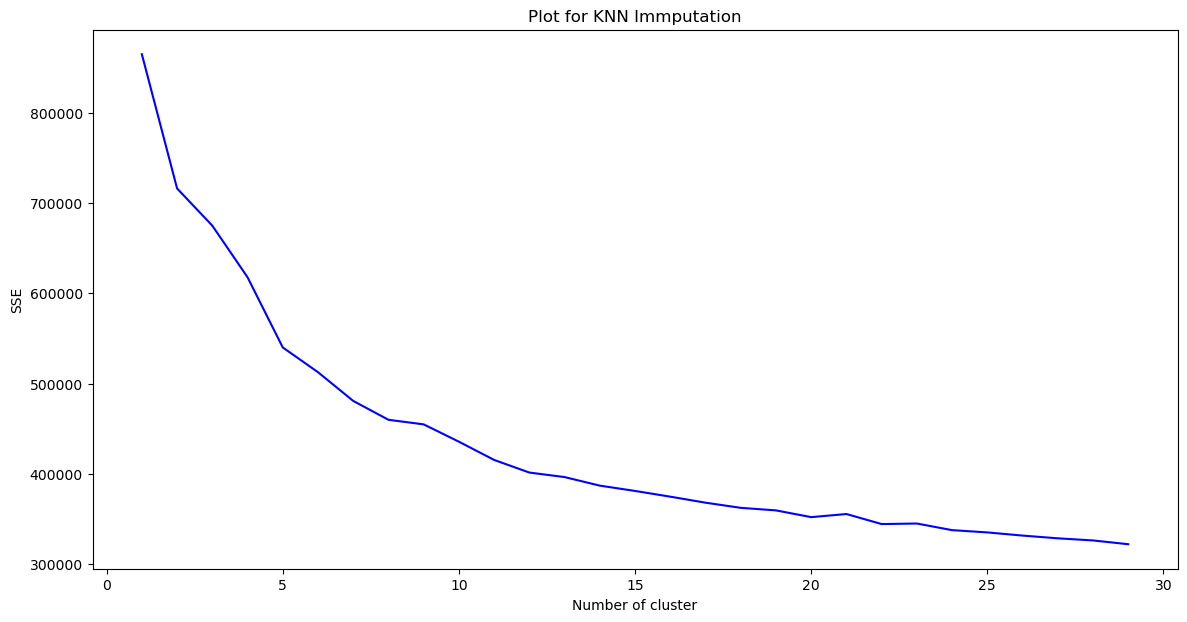

Running for  KNN Imputation with (default) 5 neighbours


C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

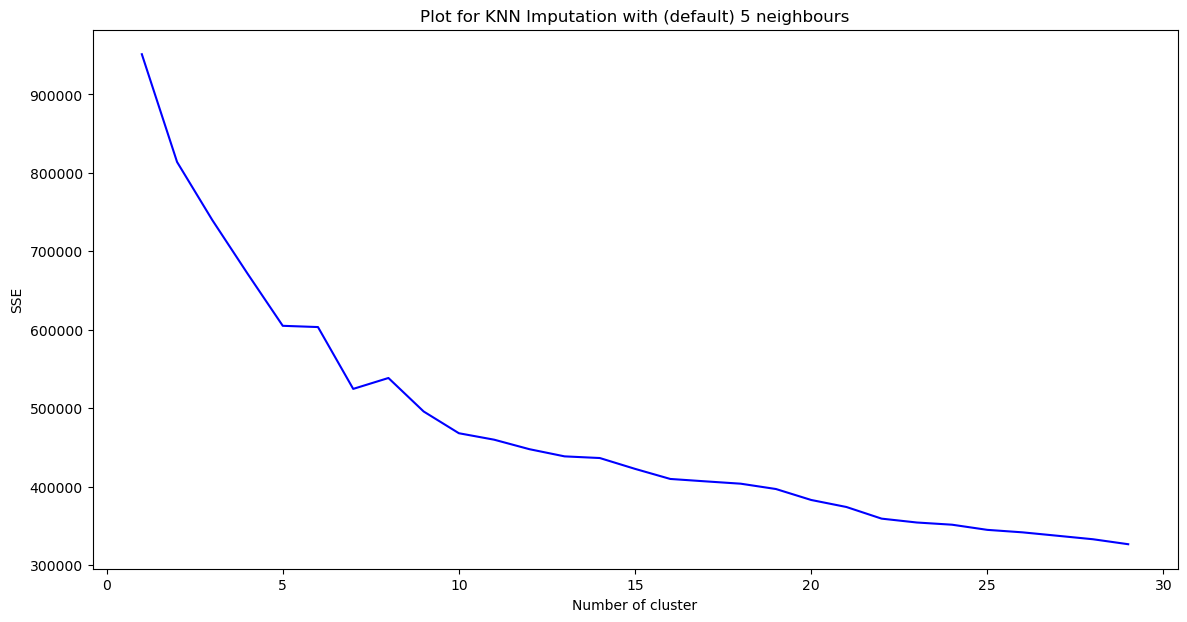

Running for  Mean Imputation 


C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

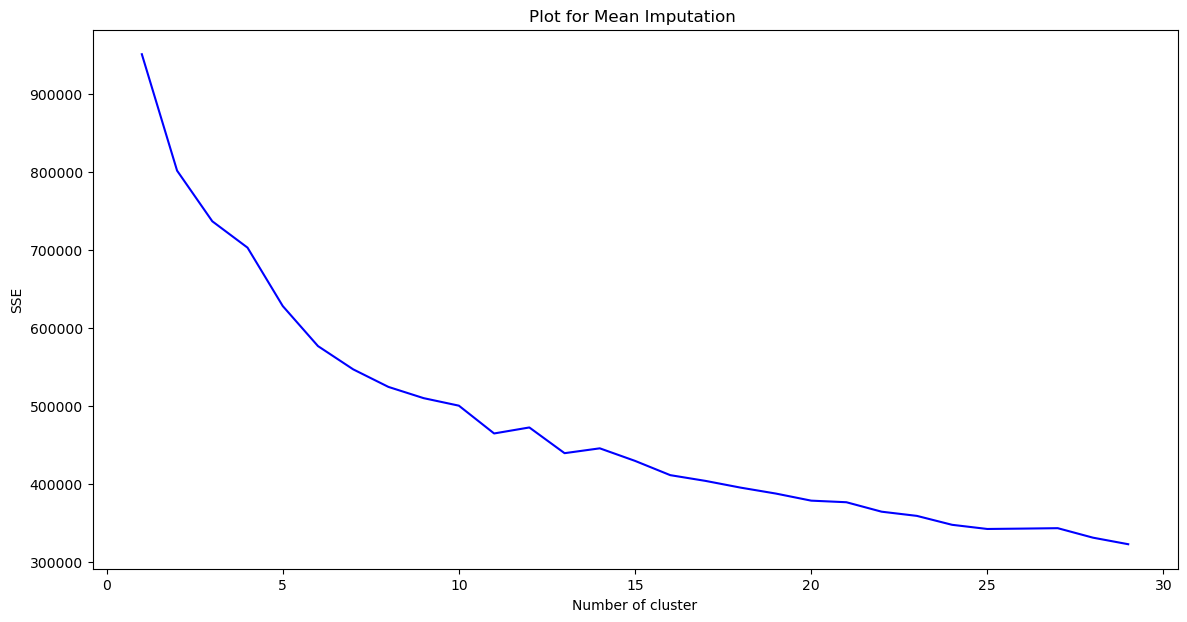

Running for  KNN Immputation + PCA


C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

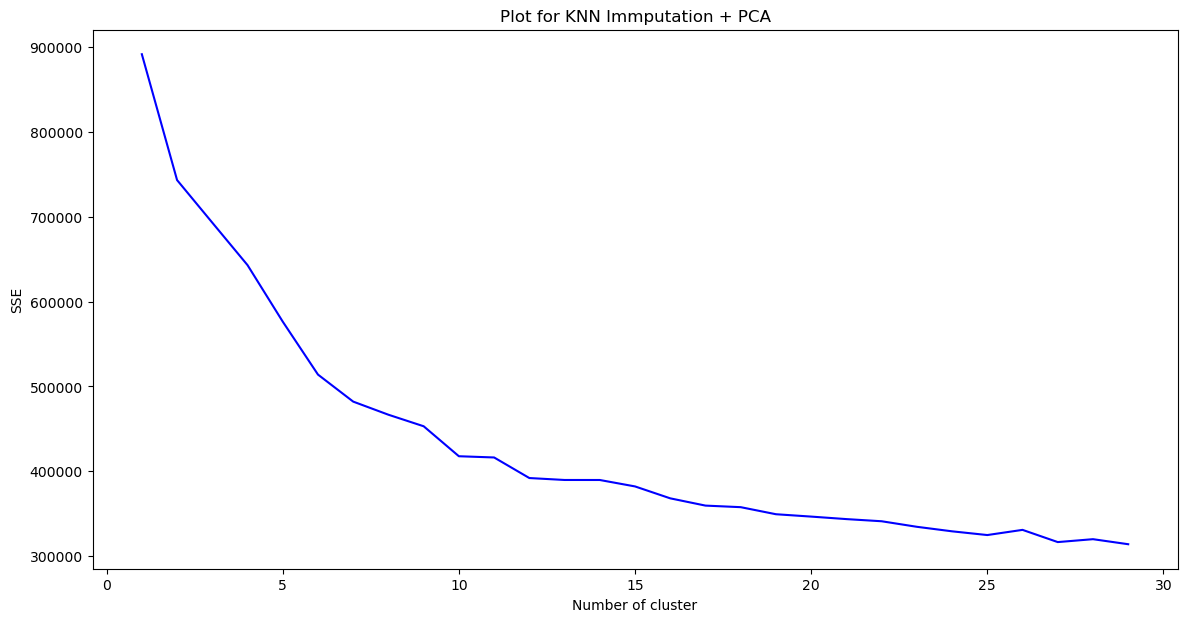

Running for  KNN Imputation Unscaled data


C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

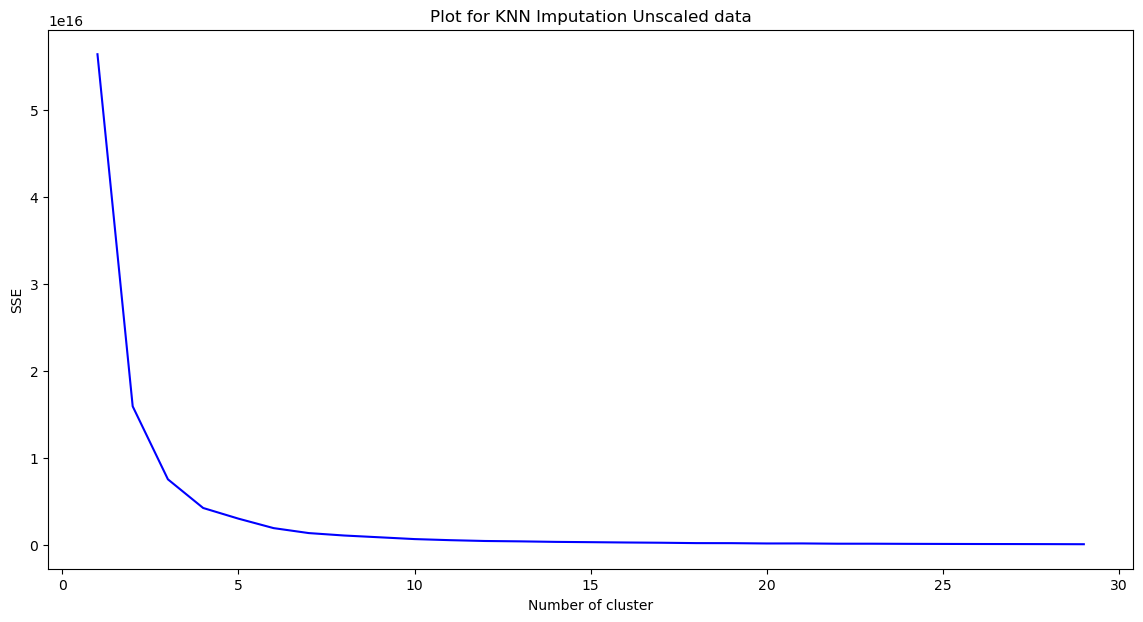

In [143]:
for name,pipeline in [('KNN Immputation',pipe_knn),('KNN Imputation with (default) 5 neighbours',pipe_knn_5),('Mean Imputation ',pipe),
                      ('KNN Imputation + PCA', pipe_knn_pca),('KNN Imputation Unscaled data',pipe_unscaled )]:

    X = pipeline.fit_transform(data)
    X = pd.DataFrame(X)
    if "PCA" not in name :
        X.columns= data.columns

    sse = {}
    #sil_score = {}
    print("Running for ",name)
    for k in range(1, 30):
        #print('K :',k)
        kmeans = MiniBatchKMeans(init="k-means++",n_clusters=k,
                              random_state=0).fit(X)
        label = kmeans.labels_
        data["clusters"] = label
        #print(data["clusters"])
        sse[k] = kmeans.inertia_ 

        #sil_score[k] = silhouette_score(X, label, metric='euclidean')

    plt.figure(figsize=(14,7))
    plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Plot for "+name)
    plt.show()

Number of clusters is around 16-20 for scaled data, while around 5 for unscaled data

# Insights/ Recommendations

Insights

- Top Paying job titles include 'Engineering Leadership','Backend Engineer','Product Manager','Program Manager','SDET','QA Engineer', 'Data Scientist', 'Android Engineer' and 'FullStack Engineer'.
- Top paying companies include 'vbvkgz','xzntr ntwyzgrgsj xzaxv ucn rna','ktgnvu','ovrnoxat ntwyzgrgsj','fvrbvqn rvmo','sgrabvz ovwyo','tqxwoogz qa mvzsvrgqt','vruyvsqtu otwhqxnxto','owyztxatq trtwnqxw xzaxv','ozvuatvr','qhmqxp xzw','ojbvzntw ogenfvqt ogrhnxgzo','uyxrxuo','ovbohzs trtwnqgzxwo','wxowg','ojbvzntw','bgqsvz onvzrtj','amo mvzp','ottpxej','bxwqgogen','nvnv wgzohrnvzwj otqcxwto'
- Among top paying companies, salary for these is getting lesser in recent years,'vbvkgz','xzntr ntwyzgrgsj xzaxv ucn rna','ktgnvu','ovrnoxat ntwyzgrgsj','fvrbvqn rvmo','sgrabvz ovwyo','tqxwoogz qa mvzsvrgqt','vruyvsqtu otwhqxnxto','owyztxatq trtwnqxw xzaxv','ozvuatvr'.
- Among Top paying companies mean salary for these company is increasing every year,  'vbvkgz','xzntr ntwyzgrgsj xzaxv ucn rna'
- Avg CTC seems to be decreasing with year.

Recommendations

- Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.
- Freshers who want best CTC should aim for companies like 'vbvkgz','xzntr ntwyzgrgsj xzaxv ucn rna','ktgnvu','ovrnoxat ntwyzgrgsj','fvrbvqn rvmo','sgrabvz ovwyo','tqxwoogz qa mvzsvrgqt','vruyvsqtu otwhqxnxto','owyztxatq trtwnqxw xzaxv','ozvuatvr','qhmqxp xzw','ojbvzntw ogenfvqt ogrhnxgzo','uyxrxuo','ovbohzs trtwnqgzxwo','wxowg','ojbvzntw','bgqsvz onvzrtj','amo mvzp','ottpxej','bxwqgogen','nvnv wgzohrnvzwj otqcxwto'